In [ ]:
"""
To Debug the Decomposition



"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-06 08:26:34,151 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-06 08:26:34,152 - settings - Setting database.user to celiib
INFO - 2021-01-06 08:26:34,153 - settings - Setting database.password to newceliipass
INFO - 2021-01-06 08:26:34,166 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-06 08:26:34,166 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-06 08:26:34,180 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-06 08:26:34,404 - settings - Setting enable_python_native_blobs to True


In [3]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 30)
print(f"Sleeping {random_sleep_sec} sec before conneting")
#time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-06 08:26:34,495 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-06 08:26:34,495 - settings - Setting database.user to celiib
INFO - 2021-01-06 08:26:34,496 - settings - Setting database.password to newceliipass
INFO - 2021-01-06 08:26:34,499 - settings - Setting enable_python_native_blobs to True


Sleeping 21 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-06 08:26:34,735 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [4]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [5]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 7240


In [6]:
#so that it will have the adapter defined
from datajoint_utils import *

# Segment That we are checking

In [112]:
segment_id=864691135269687205 #has the error where missing parts in the stitching
segment_id = 864691135946659937
segment_id= 864691136422852911 #part of mesh piece missing

In [113]:
#1) Get the segment id from the key
description = "0_25"
print(f"\n\n----- Working on {segment_id}-------")
global_start = time.time()

#2) Get the decimated mesh
current_neuron_mesh = du.fetch_segment_id_mesh(segment_id)

#3) Get the somas info *************************** Need to change this when actually run *******************
somas = du.get_soma_mesh_list(segment_id) 
print(f"somas = {somas}")
#4) Run the preprocessing


total_neuron_process_time = time.time()



----- Working on 864691136422852911-------
somas = [[], array([], dtype=float64), array([], dtype=float64)]


In [9]:
du.plot_decimated_mesh_with_somas(segment_id)

Segment_id = 864691136422852911
vertices = 786166, faces= = 1630259


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Doing the decomposition function

In [10]:
import preprocessing_vp2 as pre
pre = reload(pre)
import skeleton_utils as sk
sk = reload(sk)

In [ ]:
total_neuron_process_time = time.time()

print(f"\n--- Beginning preprocessing of {segment_id}---")
recovered_neuron = neuron.Neuron(
mesh = current_neuron_mesh,
somas = None,
segment_id=segment_id,
description=description,
suppress_preprocessing_print=False,
suppress_output=False,
calculate_spines=True,
widths_to_calculate=["no_spine_median_mesh_center"]

        )

print(f"\n\n\n---- Total preprocessing time = {time.time() - total_neuron_process_time}")


--- Beginning preprocessing of 864691136422852911---
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_60880.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_60880_fill_holes.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/fill_holes_217242.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter

xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/decimation_meshlab_25955173.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(31862, 3), faces.shape=(63736, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.0007791519165039062
2) Staring: Generating CGAL segmentation for neu

xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/decimation_meshlab_25955173.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(914, 3), faces.shape=(1824, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.00023126602172851562
2) Staring: Generating CGAL segmentation for neuro

mesh.is_watertight = True
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/poisson_209961.mls is being deleted....
Inside sphere validater: ratio_val = 351.4665747018558
--->This soma mesh was not added because it did not pass the sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(331, 3), faces.shape=(656, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(3062, 3), faces.shape=(6120, 3))>
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/864691136422852911/neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/86469113

yz = 6.303305600337339 ratio was beyong 6 multiplier
mesh.is_watertight = True
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/poisson_494747.mls is being deleted....
Inside sphere validater: ratio_val = 70.47363041605075
--->This soma mesh was not added because it did not pass the sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(707, 3))>, curr_side_len_check = False, curr_volume_check = False
mesh.is_watertight = True
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/poisson_291496.mls is being deleted....
Inside sphere validater: ratio_val = 375.03307298655614
--->This soma mesh was not added because it did not pass the sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(319, 3), faces.shape=(632, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(2578, 3), faces.shape=(5152, 3))>
xvfb-run -


-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(575, 3), faces.shape=(1146, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.0003097057342529297
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2, path_and_filename = /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/864691136422852911011_fixed 
1
Finished CGAL segmentation algorithm: 0.07189321517944336
2) Finished: Generating CGAL segmentation for neuron: 0.09785604476928711
3) Staring: Generating Graph Structure and Identifying Soma using soma size threshold  = 3000
my_list_keys = [0, 1, 2]
soma_index = -1
3) Finished: Gene


-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(515, 3), faces.shape=(1026, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.00021910667419433594
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2, path_and_filename = /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/864691136422852911014_fixed 
1
Finished CGAL segmentation algorithm: 0.0582423210144043
2) Finished: Generating CGAL segmentation for neuron: 0.07694625854492188
3) Staring: Generating Graph Structure and Identifying Soma using soma size threshold  = 3000
my_list_keys = [0, 1, 2, 3]
soma_index = -1
3) Finished: G


-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(465, 3), faces.shape=(926, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.00023245811462402344
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2, path_and_filename = /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/864691136422852911017_fixed 
1
Finished CGAL segmentation algorithm: 0.057115793228149414
2) Finished: Generating CGAL segmentation for neuron: 0.07369756698608398
3) Staring: Generating Graph Structure and Identifying Soma using soma size threshold  = 3000
my_list_keys = [0, 1, 2, 3]
soma_index = -1
3) Finished: 


-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_864691136422852911_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(419, 3), faces.shape=(834, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.00032210350036621094
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2, path_and_filename = /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/864691136422852911021_fixed 
1
Finished CGAL segmentation algorithm: 0.05196785926818848
2) Finished: Generating CGAL segmentation for neuron: 0.07056832313537598
3) Staring: Generating Graph Structure and Identifying Soma using soma size threshold  = 3000
my_list_keys = [0, 1, 2, 3]
soma_index = -1
3) Finished: G


Largest hole before segmentation = 69407.57167203716, after = 180361.82163534878,
ratio = 2.598589999482906, difference = 110954.24996331162
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_12674.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_12674_fill_holes.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/fill_holes_904422.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_12674.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_12674_fill_holes.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/fill_holes_904422.mls is being deleted....
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $


Timed out when trying to find the cycles!
Finding the cycles did not work when doing the border vertex edge so using connected components
Largest hole before segmentation = 358421.65322459716, after = 370773.11070380284,
ratio = 1.0344606899948254, difference = 12351.457479205681
Soma List = [<trimesh.Trimesh(vertices.shape=(15966, 3), faces.shape=(31662, 3))>, <trimesh.Trimesh(vertices.shape=(13285, 3), faces.shape=(25937, 3))>]
soma_mesh_list_centers = [array([519874.99545284, 727075.15658273, 697836.50073907]), array([514459.10544223, 710559.43847948, 700474.82135491])]
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_40363.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_40363_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_140525.mls
removed temporary input file: /notebooks/Platinum_Datajo

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.80s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.450760841369629
connecting at the root
branches_touching_root = [87]
length of Graph = 23234
Working on path [7458. 7477. 7502. 7538. 7569. 7599. 7632. 7636.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [11034. 11038. 11047. 11050. 11055. 11058. 11062.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
Working on path [11749. 11754. 11759. 11763. 11770. 11777. 11783. 11784.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [14136. 14150. 14166. 14180.]
path_degrees = [3, 2, 2, 3]
Working on path [14498. 14518. 14541. 14579. 14614. 14639. 14656.]
path_degrees = [4, 2, 2, 2, 2, 2, 3]
Working on path [15493. 15509. 15521. 15536. 15554. 15577. 15594.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
Working on path [15737. 15728. 15723. 15722. 15726. 15730. 15740.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 87, len(kept_branches_idx) = 81
empty_indices % = 0.0
 conflict_indices


AFTER face_lookup_resolved_test



Decomposing first pass: 24.412957429885864
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1800, 753, 227, 3042, 14026, 3952, 178, 1993, 6225]
mesh_large_connectivity: 0.05136394500732422
Finding MAP candidates connected components: 0.000171661376953125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.9487206935882568
Grouping MP Sublimbs by Graph: 0.19128823280334473
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.009413480758666992
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Ne


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0634925365447998
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.353667497634888
Checking connected components after removing cycles
Total time for mesh KDTree = 0.22976374626159668
sbv[0].reshape(-1,3) = [[519524.3 729977.1 705259.6]]
closest_sk_pt_coord BEFORE = [520338. 731039. 706151.]
current_skeleton.shape = (1132, 2, 3)
node_for_stitch = 592: [520338. 731039. 706151.]
node_for_stitch AFTER = 592: [520338. 731039. 706151.]
possible_node_loc = [   0    6  141  182  188  281  285  322  365  592  643  674  737  829
  909  989 1009 1071 1132]
possible_node_loc AFTER = [   0    6  141  182  188  281  285  322  365  592  643  674  737  829
  909  989 1009 1071 1132]
curr_shortest_path = [592]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [5203


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1056, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 21.756506204605103
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_84442.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_84442_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_906301.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_84442.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 9.556243419647217
mesh_correspondence_first_pass: 9.556275129318237
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (1056, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1056, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.12161908926228997
 conflict_indices % = 0.037041664063964024



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 34.10184073448181
correspondence_1_to_1: 2.779543876647949
Total time for MAP sublimb processing 34.101950883865356
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005986928939819336
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0036699771881103516
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00965428352355957
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.008072853088378906
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20937161430119178
 conflict_indices % = 0.0035211267605633804



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1961755233494364
 conflict_indices % = 0.01537842190016103



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 1056: [540279. 741631. 724085.]
node_for_stitch AFTER = 1056: [540279. 741631. 724085.]
possible_node_loc = [ 544 1056]
possible_node_loc AFTER = [ 544 1056]
curr_shortest_path = [1056]
Current stitch point was a branch or endpoint
sk_conn = [1, 13]
conn = [1, 13]
winning_vertex = [541165.92165799 741376.86605906 724237.53199582]
MP_branches_with_stitch_point = [1, 13]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1602452164220695
 conflict_indices % = 0.014341445290730077



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 13]
MP_branches_for_correspondence = [ 1 13]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 245: [517288. 716015. 754325.]
node_for_stitch AFTER = 245: [517288. 716015. 754325.]
possible_node_loc = [263 264]
possible_node_loc AFTER = [263 264]
curr_shortest_path = [245, 256.0, 263.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 379.239332621767
Changing the stitch point becasue the distance to end or branch node was 379.239332621767
New stitch point has degree 1
sk_conn = [3, 14]
conn = [3, 14]
winning_vertex = [517530.54905001 715557.68246554 754626.73446351]
MP_branches_with_stitch_point = [3, 14]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2052863436123348
 conflict_indices % = 0.02343612334801762



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [3, 14]
MP_branches_for_correspondence = [ 3 14]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 6: [514551. 741568. 726960.]
node_for_stitch AFTER = 6: [514551. 741568. 726960.]
possible_node_loc = [  6 367]
possible_node_loc AFTER = [  6 367]
curr_shortest_path = [6]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [514278.51821753 741697.89126106 727640.42006123]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.223504504130516
 conflict_indices % = 0.007119432105940471



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 918: [527953. 740703. 719199.]
node_for_stitch AFTER = 918: [527953. 740703. 719199.]
possible_node_loc = [ 544 1056]
possible_node_loc AFTER = [ 544 1056]
curr_shortest_path = [918, 921.0, 923.0, 926.0, 930.0, 932.0, 935.0, 938.0, 942.0, 945.0, 947.0, 949.0, 951.0, 953.0, 955.0, 957.0, 959.0, 961.0, 963.0, 966.0, 968.0, 969.0, 972.0, 973.0, 975.0, 977.0, 980.0, 982.0, 984.0, 985.0, 986.0, 988.0, 990.0, 991.0, 994.0, 996.0, 997.0, 998.0, 999.0, 1000.0, 1001.0, 1002.0, 1003.0, 1004.0, 1005.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1011.0, 1012.0, 1013.0, 1014.0, 1015.0, 1016.0, 1017.0, 1018.0, 1019.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1027.0, 1028.0, 1029.0, 1030.0, 1031.0, 1032.0, 1033.0, 1034.0, 1035.0, 1036.0, 1037.0, 1038.0, 1039.0, 1040.0, 1041.0, 1042.0, 1043.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13063312137130217
 conflict_indices % = 0.014100082941664363



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12156913516312791
 conflict_indices % = 0.02731745209735888



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [7]
MP_branches_for_correspondence = [7]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
node_for_stitch = 641: [520994. 730391. 718285.]
node_for_stitch AFTER = 641: [520994. 730391. 718285.]
possible_node_loc = [264 367 690 871]
possible_node_loc AFTER = [264 367 690 871]
curr_shortest_path = [641, 649.0, 654.0, 667.0, 690.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 590.0944525133355
sk_conn = [0]
conn = [0]
winning_vertex = [521027.48632431 730020.50716545 718312.27819234]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05551020408163265
 conflict_indices % = 0.0024489795918367346



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21329904177209938
 conflict_indices % = 0.01323267100842079



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
node_for_stitch = 995: [532533. 734058. 727099.]
node_for_stitch AFTER = 995: [532533. 734058. 727099.]
possible_node_loc = [871 995]
possible_node_loc AFTER = [871 995]
curr_shortest_path = [995]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [532939.15658837 734310.87926991 727349.09487403]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [9]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2123184345502349
 conflict_indices % = 0.014913150295245894



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
node_for_stitch = 375: [518963. 731392. 714367.]
node_for_stitch AFTER = 375: [518963. 731392. 714367.]
possible_node_loc = [367 641]
possible_node_loc AFTER = [367 641]
curr_shortest_path = [375, 381.0, 383.0, 382.0, 385.0, 390.0, 393.0, 398.0, 406.0, 408.0, 409.0, 412.0, 410.0, 407.0, 404.0, 400.0, 394.0, 391.0, 386.0, 372.0, 367.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2821.162445872275
sk_conn = [0]
conn = [0]
winning_vertex = [519100.25954088 731098.88021015 713970.08092624]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08844621513944223
 conflict_indices % = 0.024701195219123506



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2193051055747961
 conflict_indices % = 0.012344989386660708



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (7, 0) 



Time for decomp of Limb = 115.98065519332886
Number of matching vertices = 51
Number of matching vertices = 25
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[514493. 716181. 706760.]
 [520338. 731039. 706151.]]
Number of end_nodes BEFORE filtering = 48
all_single_nodes_to_eliminate = [9, 12]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



347945 347946
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
root_curr = [526005.8 729086.4 695224.4]
Time for preparing soma vertices and root: 0.0002696514129638672
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.92s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.225236415863037
branches_touching_root = [6]
length of Graph = 27960
Working on path [1411. 1412. 1413. 1414. 1415.]
path_degrees = [3, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 76, len(kept_branches_idx) = 76
empty_indices % = 0.0
 conflict_indices % = 0.00594282332819756



AFTER face_lookup_resolved_test



Decomposing first pass: 19.62748885154724
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7765, 11281, 1065, 2142]
mesh_large_connectivity: 0.012791633605957031
Finding MAP candidates connected components: 0.00012564659118652344
len(filtered_pieces) = 2
skeleton_connectivity_MP : 1.104921817779541
Grouping MP Sublimbs by Graph: 0.14758968353271484
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0012059211730957031
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Un


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03441047668457031
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.762648582458496
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07828569412231445
sbv[0].reshape(-1,3) = [[522699.3 733910.3 699251.1]]
closest_sk_pt_coord BEFORE = [522911. 734412. 698787.]
current_skeleton.shape = (415, 2, 3)
node_for_stitch = 0: [522911. 734412. 698787.]
node_for_stitch AFTER = 0: [522911. 734412. 698787.]
possible_node_loc = [  0 403]
possible_node_loc AFTER = [  0 403]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [522911. 734412. 698787.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[522911., 734412., 698787.]])}
    Total time for Fixing Skele


Total time for decomposition = 5.6294779777526855
mesh_correspondence_first_pass: 5.629509925842285
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (415, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (415, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.019446233097231164
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 14.699948072433472
correspondence_1_to_1: 0.547701358795166
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.008231639862060547
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_219889.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original m


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03406834602355957
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.27731990814209
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11904597282409668
sbv[0].reshape(-1,3) = [[526005.8 729086.4 695224.4]]
closest_sk_pt_coord BEFORE = [526027. 730071. 694650.]
current_skeleton.shape = (435, 2, 3)
node_for_stitch = 0: [526027. 730071. 694650.]
node_for_stitch AFTER = 0: [526027. 730071. 694650.]
possible_node_loc = [  0 204 210 268 376 414 435]
possible_node_loc AFTER = [  0 204 210 268 376 414 435]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [526027. 730071. 694650.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[526027., 730071., 6946


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (424, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.684906959533691
Working on limb correspondence for #1 MAP piece
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_38789.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_38789_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_988036.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_38789.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 2.445779323577881
mesh_correspondence_first_pass: 2.4458115100860596
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (424, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (424, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.09214522363335174
 conflict_indices % = 0.05590833793484263



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 15.094260931015015
correspondence_1_to_1: 0.9552516937255859
Total time for MAP sublimb processing 29.794429779052734
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.020667076110839844
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0074939727783203125
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00850820541381836
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 403: [533538. 782465. 699185.]
node_for_stitch AFTER = 403: [533538. 782465. 699185.]
possible_node_loc = [  0 403]
possible_node_




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.02368421052631579
 conflict_indices % = 0.007551487414187643



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [5, 36]
MP_branches_for_correspondence = [ 5 36]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (0, 1) connection-----
node_for_stitch = 210: [540157. 742222. 693068.]
node_for_stitch AFTER = 210: [540157. 742222. 693068.]
possible_node_loc = [210 253]
possible_node_loc AFTER = [210 253]
curr_shortest_path = [210]
Current stitch point was a branch or endpoint
sk_conn = [15, 16]
conn = [15, 16]
winning_vertex = [540383.63312199 742712.42158232 693229.13060321]
MP_branches_with_stitch_point = [15, 16]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2146726512923696
 conflict_indices % = 0.01800546870969406



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [15, 16]
MP_branches_for_correspondence = [15 16]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 1) 




---- Working on (1, 1) connection-----
node_for_stitch = 424: [553848. 728633. 689746.]
node_for_stitch AFTER = 424: [553848. 728633. 689746.]
possible_node_loc = [177 424]
possible_node_loc AFTER = [177 424]
curr_shortest_path = [424]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [554513.57152801 729015.03788341 690181.20281978]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1826889945558542
 conflict_indices % = 0.014196127076011303



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 




---- Working on (2, 1) connection-----
node_for_stitch = 370: [547501. 740718. 696009.]
node_for_stitch AFTER = 370: [547501. 740718. 696009.]
possible_node_loc = [253 370]
possible_node_loc AFTER = [253 370]
curr_shortest_path = [370]
Current stitch point was a branch or endpoint
sk_conn = [1, 3]
conn = [1, 3]
winning_vertex = [548057.41325626 740606.62589095 695788.64572769]
MP_branches_with_stitch_point = [1, 3]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2128856939117698
 conflict_indices % = 0.010734866151444485



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 3]
MP_branches_for_correspondence = [1 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 1) 



Time for decomp of Limb = 88.40211629867554
Number of matching vertices = 0
Number of matching vertices = 27
Number of matching vertices = 45
Number of matching vertices = 0
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[522911. 734412. 698787.]
 [526027. 730071. 694650.]]
Number of end_nodes BEFORE filtering = 42
all_single_nodes_to_eliminate = [17, 18]



Removed 1 skeletal branches



277143 277144
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
root_curr = [515127.3 704098.3 698884.9]
Time for preparing soma vertices and root: 0.0002760887145996094
invalidation_d = 12000


  0%|          | 0/1 [00:00<?, ?it/s]

cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.3130602836608887
connecting at the root
branches_touching_root = [10]
length of Graph = 7204
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003722982758149575


In [131]:
debug

> <__array_function__ internals>(6)concatenate()

ipdb> u
> /usr/local/lib/python3.6/dist-packages/numpy/core/shape_base.py(283)vstack()
    281     if not isinstance(arrs, list):
    282         arrs = [arrs]
--> 283     return _nx.concatenate(arrs, 0)
    284 
    285 

ipdb> u
> <__array_function__ internals>(6)vstack()

ipdb> u
> /meshAfterParty/skeleton_utils.py(4704)skeletonize_and_clean_connected_branch_CGAL()
   4702                                 verbose = False)
   4703     if coordinates_to_keep is not None:
-> 4704         coordinates_to_keep = np.vstack([coordinates_to_keep,sign_coordinates_from_mesh])
   4705     else:
   4706         coordinates_to_keep = sign_coordinates_from_mesh

ipdb> sign_coordinates_from_mesh
[]
ipdb> coordinates_to_keep
array([[520336., 731054., 706185.],
       [514492., 716171., 706807.]])
ipdb> c


In [122]:
debug

> /meshAfterParty/skeleton_utils.py(1781)clean_skeleton()
   1779                         print(f"end_nodes = {end_nodes}")
   1780                         print(f"end_node_idx = {end_node_idx}")
-> 1781                         raise Exception("Something went wrong when trying to find end nodes")
   1782                     else:
   1783                         print(f"end_nodes = {end_nodes} wasn't endnode but continuing anyway")

ipdb> u
> /meshAfterParty/skeleton_utils.py(4721)skeletonize_and_clean_connected_branch_CGAL()
   4719 #                         skeleton_mesh=branch,
   4720                         endpoints_must_keep = coordinates_to_keep,
-> 4721                       print_flag=False)
   4722 
   4723 #                     sk_debug = True

ipdb> coordinates_to_keep.shape
(1130, 3)
ipdb> sign_coordinates_from_mesh.shape
(1128, 3)
ipdb> c


In [123]:
debug

> /meshAfterParty/skeleton_utils.py(1781)clean_skeleton()
   1779                         print(f"end_nodes = {end_nodes}")
   1780                         print(f"end_node_idx = {end_node_idx}")
-> 1781                         raise Exception("Something went wrong when trying to find end nodes")
   1782                     else:
   1783                         print(f"end_nodes = {end_nodes} wasn't endnode but continuing anyway")

ipdb> filter_end_node_length
*** NameError: name 'filter_end_node_length' is not defined
ipdb> u
> /meshAfterParty/skeleton_utils.py(4721)skeletonize_and_clean_connected_branch_CGAL()
   4719 #                         skeleton_mesh=branch,
   4720                         endpoints_must_keep = coordinates_to_keep,
-> 4721                       print_flag=False)
   4722 
   4723 #                     sk_debug = True

ipdb> filter_end_node_length
4000
ipdb> c


In [128]:
ret_coords = sk.find_end_nodes_with_significant_mesh_correspondence(
                                mesh = mesh,
                                skeleton = current_skeleton,
                                skeleton_considered_max=4000+2,
                                plot_viable_endpoint_correspondences = False,
                                plot_keep_endpoints = False,
                                verbose = True)

0th endnode (0) was not checked because length was 9271.708402922519
1th endnode (1) was not checked because length was 15850.504778562465
2th endnode (182) was not checked because length was 900.074914097696
3th endnode (184) was not checked because length was 1318.5601727405426
4th endnode (278) was not checked because length was 483.02594976564876
5th endnode (288) was not checked because length was 749.3270415910305
6th endnode (314) was not checked because length was 162.61303760769
7th endnode (366) was not checked because length was 1191.035270822423
8th endnode (595) was not checked because length was 1587.2973873496458
9th endnode (672) was not checked because length was 224.84439063494557
10th endnode (752) was not checked because length was 1482.6976515347376
11th endnode (794) was not checked because length was 61.59545437773797
13th endnode (979) was not checked because length was 571.1766599923792
14th endnode (999) was not checked because length was 635.1171394095472
15t

In [129]:
ret_coords

[]

In [118]:
mesh = su.decompress_pickle("mesh")
current_skeleton = su.decompress_pickle("current_skeleton.pbz2")
coordinates_to_keep = su.decompress_pickle("coordinates_to_keep.pbz2")

In [121]:
coordinates_to_keep.shape

(1130, 3)

In [119]:
nviz.plot_objects(mesh,
                 skeletons=[current_skeleton],
                 scatters=[coordinates_to_keep],
                 scatter_size=1)

In [ ]:
nviz.visualize_neuron(
                        recovered_neuron,
                      visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L1="all")
                     )

In [ ]:
recovered_neuron.save_compressed_neuron("/notebooks/test_neurons/Segmentation_3/Multi_Soma/",
                                       export_mesh=True)

# Running the Function to Decompose

In [11]:
#predefined arguments for the Neuron constructor

decomposition_type="meshafterparty"
mesh_correspondence="meshparty" #meshafterparty_adaptive
distance_by_mesh_center=True #how the distance is calculated for mesh correspondence
meshparty_segment_size = 100
meshparty_n_surface_downsampling = 2
meshparty_adaptive_correspondence_after_creation=False
suppress_preprocessing_print=True
computed_attribute_dict=None


branch_skeleton_data=None
combine_close_skeleton_nodes = True
combine_close_skeleton_nodes_threshold=700

ignore_warnings=True
suppress_output=False
calculate_spines=True
widths_to_calculate=["no_spine_median_mesh_center"]
fill_hole_size=0# The old value for the parameter when performing 2000,

preprocessing_version=2
limb_to_branch_objects=None

In [12]:
#arguments for the preprocess neuron
mesh = current_neuron_mesh
segment_id=segment_id
description=description

sig_th_initial_split=15 #for significant splitting meshes in the intial mesh split
limb_threshold = 2000 #the mesh faces threshold for a mesh to be qualified as a limb (otherwise too small)
filter_end_node_length=4500 #used in cleaning the skeleton during skeletonizations
return_no_somas = False

decomposition_type=decomposition_type
mesh_correspondence=mesh_correspondence
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size =meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling
somas=somas
branch_skeleton_data=branch_skeleton_data
combine_close_skeleton_nodes = combine_close_skeleton_nodes
combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold

use_meshafterparty=True

# Starting of the preprocessing function

In [13]:
from preprocessing_vp2 import *

In [14]:
pre_branch_connectivity = "edges"
print(f"use_meshafterparty = {use_meshafterparty}")

whole_processing_tiempo = time.time()


"""
Purpose: To process the mesh into a format that can be loaded into the neuron class
and used for higher order processing (how to visualize is included)

This method includes the fusion

"""
if description is None:
    description = "no_description"
if segment_id is None:
    #pick a random segment id
    segment_id = np.random.randint(100000000)
    print(f"picking a random 7 digit segment id: {segment_id}")
    description += "_random_id"


if mesh is None:
    if mesh_file is None:
        raise Exception("No mesh or mesh_file file were given")
    else:
        current_neuron = tu.load_mesh_no_processing(mesh_file)
else:
    current_neuron = mesh




use_meshafterparty = True


In [15]:
# -------- Phase 1: Doing Soma Detection (if Not already done) ---------- #
if somas is None:
    soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)
else:
    soma_mesh_list,run_time,total_soma_list_sdf = somas
    print(f"Using pre-computed somas: soma_mesh_list = {soma_mesh_list}")

# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
    if return_no_somas:
        return_value= soma_mesh_list_centers
    raise Exception("Processing of No Somas is not yet implemented yet")
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

        

Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(15545, 3), faces.shape=(30785, 3))>, <trimesh.Trimesh(vertices.shape=(13375, 3), faces.shape=(26130, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(15545, 3), faces.shape=(30785, 3))>, <trimesh.Trimesh(vertices.shape=(13375, 3), faces.shape=(26130, 3))>]
soma_mesh_list_centers = [array([519831.33103892, 726999.16846574, 697797.21417819]), array([514338.05902804, 710675.41905046, 700617.46993645])]


In [16]:
#--- Phase 2: getting the soma submeshes that are connected to each soma and identifiying those that aren't 
# ------------------ (and eliminating any mesh pieces inside the soma) ------------------------

# -------- 11/13 Addition: Will remove the inside nucleus --------- #
interior_time = time.time()
main_mesh_total,inside_nucleus_pieces = tu.remove_mesh_interior(current_neuron,return_removed_pieces=True,
                                                               try_hole_close=False)
print(f"Total time for removing interior = {time.time() - interior_time}")


#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_time = time.time()
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False,
                            connectivity=pre_branch_connectivity)
print(f"Total time for splitting mesh = {time.time() - split_time}")

print(f"# total split meshes = {len(split_meshes)}")

#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list,
                                        split_meshes)

# filtering away any of the inside floating pieces: 
non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]

#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    """
    *** want to save these pieces that are inside of the soma***
    """

    non_soma_touching_meshes,inside_pieces = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split,
                                    return_inside_pieces = True)

else:
    non_soma_touching_meshes = []
    inside_pieces=[]

#adding in the nuclei center to the inside pieces
inside_pieces += inside_nucleus_pieces


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]


#     print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
#     print(f"# of inside pieces = {len(inside_pieces)}")
print(f"\n-----Before filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

# ------ 11/15 Addition: Part 2.b 

"""
Pseudocode: 
1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
2) Save all other meshes not the largest in 
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf


"""
#1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
soma_containing_meshes_keys = np.array(list(soma_containing_meshes.keys()))
soma_touching_meshes = np.array([split_meshes[k] for k in soma_containing_meshes_keys])
largest_soma_touching_mesh_idx = soma_containing_meshes_keys[np.argmax([len(kk.faces) for kk in soma_touching_meshes])]

#2) Save all other meshes not the largest in 
not_processed_soma_containing_meshes_idx = np.setdiff1d(soma_containing_meshes_keys,[largest_soma_touching_mesh_idx])
not_processed_soma_containing_meshes = [split_meshes[k] for k in not_processed_soma_containing_meshes_idx]
print(f"Number of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)}")

"""
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf

"""

somas_idx_to_process = soma_containing_meshes[largest_soma_touching_mesh_idx]
soma_mesh_list = [soma_mesh_list[k] for k in somas_idx_to_process]

soma_containing_meshes = {largest_soma_touching_mesh_idx:list(np.arange(0,len(soma_mesh_list)))}

soma_touching_meshes = [split_meshes[largest_soma_touching_mesh_idx]]

total_soma_list_sdf = total_soma_list_sdf[somas_idx_to_process]

print(f"\n-----After filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_8923.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_8923_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_547206.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_8923.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_8923_remove_interior.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_547206.mls is being deleted....


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(40490, 3), faces.shape=(120677, 3))>, <trimesh.Trimesh(vertices.shape=(24532, 3), faces.shape=(68938, 3))>]
Total time for removing interior = 72.10900449752808


WARNING - 2021-01-06 08:28:29,155 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:28:29,158 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:28:29,170 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:28:29,210 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:28:29,236 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:28:29,266 - base - face_normals all zero, ignoring!


Total time for splitting mesh = 1.7989287376403809
# total split meshes = 60
There were 58 pieces found after size threshold

-----Before filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}
Number of not_processed_soma_containing_meshes = 0

-----After filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


In [17]:
#--- Phase 3:  Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print(f"\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    current_time = time.time()
    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250,
                                               connectivity=pre_branch_connectivity)
    print(f"Total time for Subtract Soam = {time.time() - current_time}")
    current_time = time.time()

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)

    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    print(f"Total time for Original_mesh_faces_map for mesh_pieces without soma= {time.time() - current_time}")
    current_time = time.time()
    soma_meshes = current_mesh.submesh([soma_faces],append=True,repair=False)

    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True,repair=False)

    print(f"Total time for Original_mesh_faces_map for somas= {time.time() - current_time}")
    current_time = time.time()

    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False,
                                                        connectivity=pre_branch_connectivity)
    #take the top largest ones depending how many were originally in the soma list
    seperate_soma_meshes = seperate_soma_meshes[:len(soma_mesh_list)]
    soma_face_components = soma_face_components[:len(soma_mesh_list)]

    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes




    # 3) Find all significant mesh pieces
    """
    Pseudocode: 
    a) Iterate through all of the somas and get the pieces that are connected
    b) Concatenate all the results into one list and order
    c) Filter away the mesh pieces that aren't touching and add to the floating pieces

    """
    sig_non_soma_pieces,insignificant_limbs = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=limb_threshold,
                                                     return_insignificant_pieces=True,
                                                                         connectivity=pre_branch_connectivity)

    # a) Filter these down to only those touching the somas
    all_conneted_non_soma_pieces = []
    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        all_conneted_non_soma_pieces.append(connected_mesh_pieces)

    #b) Iterate through all of the somas and get the pieces that are connected
    t_non_soma_pieces = np.concatenate(all_conneted_non_soma_pieces)

    #c) Filter away the mesh pieces that aren't touching and add to the floating pieces
    sig_non_soma_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh in t_non_soma_pieces]
    new_floating_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh not in t_non_soma_pieces]

    print(f"new_floating_pieces = {new_floating_pieces}")

    non_soma_touching_meshes += new_floating_pieces



    print(f"Total time for sig_non_soma_pieces= {time.time() - current_time}")
    current_time = time.time()

    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces






    print(f"Total time for split= {time.time() - current_time}")
    current_time = time.time()



    soma_to_piece_connectivity = dict()
    soma_to_piece_touching_vertices = dict()
    soma_to_piece_touching_vertices_idx = dict()
    limb_root_nodes = dict()

    m_vert_graph = tu.mesh_vertex_graph(current_mesh)

    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces

        soma_to_piece_touching_vertices[i] = dict()
        for piece_index,piece_idx in enumerate(connected_mesh_pieces):
            limb_root_nodes[piece_idx] = connected_mesh_pieces_vertices[piece_index][0]

            """ Old way of finding vertex connected components on a mesh without trimesh function
            #find the number of touching groups and save those 
            soma_touching_graph = m_vert_graph.subgraph(connected_mesh_pieces_vertices_idx[piece_index])
            soma_con_comp = [current_mesh.vertices[np.array(list(k)).astype("int")] for k in list(nx.connected_components(soma_touching_graph))]
            soma_to_piece_touching_vertices[i][piece_idx] = soma_con_comp
            """

            soma_to_piece_touching_vertices[i][piece_idx] = tu.split_vertex_list_into_connected_components(
                                                vertex_indices_list=connected_mesh_pieces_vertices_idx[piece_index],
                                                mesh=current_mesh, 
                                                vertex_graph=m_vert_graph, 
                                                return_coordinates=True
                                               )





#         border_debug = False
#         if border_debug:
#             print(f"soma_to_piece_connectivity = {soma_to_piece_connectivity}")
#             print(f"soma_to_piece_touching_vertices = {soma_to_piece_touching_vertices}")


    print(f"Total time for mesh_pieces_connectivity= {time.time() - current_time}")

    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

print(f"# of insignificant_limbs = {len(insignificant_limbs)} with trimesh : {insignificant_limbs}")
print(f"# of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)} with trimesh : {not_processed_soma_containing_meshes}")




# Lets have an alert if there was more than one soma disconnected meshes
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

current_mesh_data = soma_touching_mesh_data
soma_containing_idx = 0

#doing inversion of the connectivity and touching vertices
piece_to_soma_touching_vertices = gu.flip_key_orders_for_dict(soma_to_piece_touching_vertices)





----Working on soma-containing mesh piece 0----

inside Soma subtraction
Total Time for soma mesh cancellation = 2.15
Total time for Subtract Soam = 2.150413751602173
Total time for Original_mesh_faces_map for mesh_pieces without soma= 1.0593092441558838
Total time for Original_mesh_faces_map for somas= 1.0241403579711914


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


new_floating_pieces = []
Total time for sig_non_soma_pieces= 16.285562992095947
Total time for split= 2.384185791015625e-06
Total time for mesh_pieces_connectivity= 22.32112979888916
# of insignificant_limbs = 0 with trimesh : []
# of not_processed_soma_containing_meshes = 0 with trimesh : []


# Doing the Actual Limb Processing

In [18]:
pre = reload(pre)

In [25]:
# Phase 4: Skeletonization, Mesh Correspondence,  

proper_time = time.time()

#The containers that will hold the final data for the preprocessed neuron
limb_correspondence=dict()
limb_network_stating_info = dict()

# ---------- Part A: skeletonization and mesh decomposition --------- #
skeleton_time = time.time()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):

    #Arguments to pass to the specific function (when working with a limb)
    soma_touching_vertices_dict = piece_to_soma_touching_vertices[curr_limb_idx]

    curr_limb_time = time.time()
    print(f"\n\n----- Working on Proper Limb # {curr_limb_idx} ---------")
    
    if curr_limb_idx != 1:
        continue
    else:
        raise Exception("")

    print(f"meshparty_segment_size = {meshparty_segment_size}")
    limb_correspondence_individual,network_starting_info = pre.preprocess_limb(mesh=limb_mesh_mparty,
                   soma_touching_vertices_dict = soma_touching_vertices_dict,
                   return_concept_network = False, 
                   return_concept_network_starting_info=True,
                   width_threshold_MAP=500,
                   size_threshold_MAP=2000,
                   surface_reconstruction_size=1000,  

                   #arguments added from the big preprocessing step                                                            
                   distance_by_mesh_center=distance_by_mesh_center,
                   meshparty_segment_size=meshparty_segment_size,
                   meshparty_n_surface_downsampling = meshparty_n_surface_downsampling,

                    use_meshafterparty=use_meshafterparty,

                   )
    #Storing all of the data to be sent to 

    limb_correspondence[curr_limb_idx] = limb_correspondence_individual
    limb_network_stating_info[curr_limb_idx] = network_starting_info
    
    raise Exception("Finished")

print(f"Total time for Skeletonization and Mesh Correspondence = {time.time() - skeleton_time}")



# ---------- Part B: Stitching on floating pieces --------- #
print("\n\n ----- Working on Stitching ----------")

floating_stitching_time = time.time()

if len(limb_correspondence) > 0:
    non_soma_touching_meshes_to_stitch = tu.check_meshes_outside_multiple_mesh_bbox(seperate_soma_meshes,non_soma_touching_meshes,
                             return_indices=False)

    limb_correspondence_with_floating_pieces = pre.attach_floating_pieces_to_limb_correspondence(
            limb_correspondence,
            floating_meshes=non_soma_touching_meshes_to_stitch,
            floating_piece_face_threshold = 600,
            max_stitch_distance=8000,
            distance_to_move_point_threshold = 4000,
            verbose = False)
else:
    limb_correspondence_with_floating_pieces = limb_correspondence




print(f"Total time for stitching floating pieces = {time.time() - floating_stitching_time}")





# ---------- Part C: Computing Concept Networks --------- #
concept_network_time = time.time()

limb_concept_networks=dict()
limb_labels=dict()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(limb_correspondence_with_floating_pieces[curr_limb_idx],
                                                                    limb_network_stating_info[curr_limb_idx],
                                                                    run_concept_network_checks=True,
                                                                       )   



    limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    limb_labels[curr_limb_idx]= "Unlabeled"

print(f"Total time for Concept Networks = {time.time() - concept_network_time}")





----- Working on Proper Limb # 0 ---------


----- Working on Proper Limb # 1 ---------


Exception: 

In [ ]:
curr_limb_idx

# Debugging the can't find endpoints


# The Limb Preprocessing Function

In [26]:
mesh=limb_mesh_mparty
soma_touching_vertices_dict = soma_touching_vertices_dict
return_concept_network = False
return_concept_network_starting_info=True
width_threshold_MAP=500
size_threshold_MAP=2000
surface_reconstruction_size=1000  

#arguments added from the big preprocessing step                                                            
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size=meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling

use_meshafterparty=use_meshafterparty




combine_close_skeleton_nodes=True
combine_close_skeleton_nodes_threshold=700
filter_end_node_length=4000
perform_cleaning_checks = True



#parameters for MP skeletonization,

#Parameters for setting how the MAP skeletonization takes place
use_surface_after_CGAL=False

#parametrers for stitching the MAP and MP pieces together
move_MAP_stitch_to_end_or_branch = True
distance_to_move_point_threshold=500

#concept_network parameters
run_concept_network_checks = True


#printing controls
verbose = True
print_fusion_steps=True

check_correspondence_branches = True
filter_end_nodes_from_correspondence = True

error_on_no_starting_coordinates=True,
prevent_MP_starter_branch_stitches = False, #will control if a MP soma extending branch is able to be stitched to
    



In [27]:
curr_limb_time = time.time()

limb_mesh_mparty = mesh


#will store a list of all the endpoints tha tmust be kept:
limb_to_endpoints_must_keep_list = []
limb_to_soma_touching_vertices_list = []

# --------------- Part 1 and 2: Getting Border Vertices and Setting the Root------------- #
fusion_time = time.time()
#will eventually get the current root from soma_to_piece_touching_vertices[i]
if not soma_touching_vertices_dict is None:
    root_curr = soma_touching_vertices_dict[list(soma_touching_vertices_dict.keys())[0]][0][0]
else:
    root_curr = None

print(f"root_curr = {root_curr}")

if print_fusion_steps:
    print(f"Time for preparing soma vertices and root: {time.time() - fusion_time }")
    fusion_time = time.time()

# --------------- Part 3: Meshparty skeletonization and Decomposition ------------- #
sk_meshparty_obj = m_sk.skeletonize_mesh_largest_component(limb_mesh_mparty,
                                                        root=root_curr,
                                                          filter_mesh=False)

print(f"meshparty_segment_size = {meshparty_segment_size}")

if print_fusion_steps:
    print(f"Time for 1st pass MP skeletonization: {time.time() - fusion_time }")
    fusion_time = time.time()

(segment_branches, #skeleton branches
divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
segment_widths_median) = m_sk.skeleton_obj_to_branches(sk_meshparty_obj,
                                                      mesh = limb_mesh_mparty,
                                                      meshparty_segment_size=meshparty_segment_size)





if print_fusion_steps:
    print(f"Decomposing first pass: {time.time() - fusion_time }")
    fusion_time = time.time()


if use_meshafterparty:
    print("Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence")
    # --------------- Part 4: Find Individual Branches that could be MAP processed because of width ------------- #
    #gettin the branches that should be passed through MAP skeletonization
    pieces_above_threshold = np.where(segment_widths_median>width_threshold_MAP)[0]

    #getting the correspondnece info for those MAP qualifying
    width_large = segment_widths_median[pieces_above_threshold]
    sk_large = [segment_branches[k] for k in pieces_above_threshold]
    mesh_large_idx = [divided_submeshes_idx[k] for k in pieces_above_threshold]
else:
    print("Only Using MeshParty Skeletonization and Mesh Correspondence")
    mesh_large_idx = []
    width_large = []
    sk_large = []


print("Another print")
mesh_pieces_for_MAP = []
mesh_pieces_for_MAP_face_idx = []


if len(mesh_large_idx) > 0: #will only continue processing if found MAP candidates

    # --------------- Part 5: Find mesh connectivity and group MAP branch candidates into MAP sublimbs ------------- #
    print(f"Found len(mesh_large_idx) MAP candidates: {[len(k) for k in mesh_large_idx]}")

    #finds the connectivity edges of all the MAP candidates
    mesh_large_connectivity = tu.mesh_list_connectivity(meshes = mesh_large_idx,
                                                        connectivity="edges",
                            main_mesh = limb_mesh_mparty,
                            print_flag = False)
    if print_fusion_steps:
        print(f"mesh_large_connectivity: {time.time() - fusion_time }")
        fusion_time = time.time()
        
    
    """
    --------------- Grouping MAP candidates ----------------
    Purpose: Will see what mesh pieces should be grouped together
    to pass through CGAL skeletonization


    Pseudocode: 
    1) build a networkx graph with all nodes for mesh_large_idx indexes
    2) Add the edges
    3) Find the connected components
    4) Find sizes of connected components
    5) For all those connected components that are of a large enough size, 
    add the mesh branches and skeletons to the final list


    """
    G = nx.Graph()
    G.add_nodes_from(np.arange(len(mesh_large_idx)))
    G.add_edges_from(mesh_large_connectivity)
    conn_comp = list(nx.connected_components(G))
    
    print("**** Debugging big mesh connectivity ********")
    print(f"mesh_large_connectivity = {mesh_large_connectivity}")
    print(f"conn_comp = {conn_comp}")

    filtered_pieces = []

    sk_large_size_filt = []
    mesh_large_idx_size_filt = []
    width_large_size_filt = []

    for cc in conn_comp:
        total_cc_size = np.sum([len(mesh_large_idx[k]) for k in cc])
        if total_cc_size>size_threshold_MAP:
            #print(f"cc ({cc}) passed the size threshold because size was {total_cc_size}")
            filtered_pieces.append(pieces_above_threshold[list(cc)])

    if print_fusion_steps:
        print(f"Finding MAP candidates connected components: {time.time() - fusion_time }")
        fusion_time = time.time()

    #filtered_pieces: will have the indexes of all the branch candidates that should  be 
    #grouped together and passed through MAP skeletonization

    if len(filtered_pieces) > 0:
        # --------------- Part 6: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        print(f"len(filtered_pieces) = {len(filtered_pieces)}")
        #all the pieces that will require MAP mesh correspondence and skeletonization
        #(already organized into their components)
        mesh_pieces_for_MAP = [limb_mesh_mparty.submesh([np.concatenate(divided_submeshes_idx[k])],append=True,repair=False) for k in filtered_pieces]
        mesh_pieces_for_MAP_face_idx = [np.concatenate(divided_submeshes_idx[k]) for k in filtered_pieces]



        """
        Old Way: Finding connectivity of pieces through
        mesh_idx_MP = [divided_submeshes_idx[k] for k in pieces_idx_MP]

        mesh_large_connectivity_MP = tu.mesh_list_connectivity(meshes = mesh_idx_MP,
                                main_mesh = limb_mesh_mparty,
                                print_flag = False)

        New Way: going to use skeleton connectivity to determine
        connectivity of pieces

        Pseudocode: 
        1)

        """
        # --------------- Part 7: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        # ********* if there are no pieces leftover then will automatically make all the lists below just empty (don't need to if.. else.. the case)****
        pieces_idx_MP = np.setdiff1d(np.arange(len(divided_submeshes_idx)),np.concatenate(filtered_pieces))

        skeleton_MP = [segment_branches[k] for k in pieces_idx_MP]
        skeleton_connectivity_MP = sk.skeleton_list_connectivity(
                                        skeletons=skeleton_MP
                                        )
        if print_fusion_steps:
            print(f"skeleton_connectivity_MP : {time.time() - fusion_time }")
            fusion_time = time.time()

        G = nx.Graph()
        G.add_nodes_from(np.arange(len(skeleton_MP)))
        G.add_edges_from(skeleton_connectivity_MP)
        sublimbs_MP = list(nx.connected_components(G))
        sublimbs_MP_orig_idx = [pieces_idx_MP[list(k)] for k in sublimbs_MP]


        #concatenate into sublimbs the skeletons and meshes
        sublimb_mesh_idx_branches_MP = [divided_submeshes_idx[k] for k in sublimbs_MP_orig_idx]
        sublimb_mesh_branches_MP = [[limb_mesh_mparty.submesh([ki],append=True,repair=False)
                                    for ki in k] for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP = [limb_mesh_mparty.submesh([np.concatenate(k)],append=True,repair=False)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP_face_idx = [np.concatenate(k)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_skeleton_branches = [segment_branches[k] for k in sublimbs_MP_orig_idx]
        widths_MP = [segment_widths_median[k] for k in sublimbs_MP_orig_idx]

        if print_fusion_steps:
            print(f"Grouping MP Sublimbs by Graph: {time.time() - fusion_time }")
            fusion_time = time.time()


# else: #if no pieces were determine to need MAP processing
#     print("No MAP processing needed: just returning the Meshparty skeletonization and mesh correspondence")
#     raise Exception("Returning MP correspondence")


# nviz.plot_objects(main_mesh=tu.combine_meshes([limb_mesh_mparty,current_neuron["S0"].mesh]),
#                   main_mesh_color="green",
#     skeletons=sk_large_size_filt,
#      meshes=[limb_mesh_mparty.submesh([k],append=True) for k in mesh_large_idx_size_filt],
#       meshes_colors="red")








# --------------- Part 8: If No MAP sublimbs found, set the MP sublimb lists to just the whole MP branch decomposition ------------- #

#if no sublimbs need to be decomposed with MAP then just reassign all of the previous MP processing to the sublimb_MPs
if len(mesh_pieces_for_MAP) == 0:
    sublimb_meshes_MP = [limb_mesh_mparty] #trimesh pieces that have already been passed through MP skeletonization (may not need)
    # -- the decomposition information ---
    sublimb_mesh_branches_MP = [divided_submeshes] #the mesh branches for all the disconnected sublimbs
    sublimb_mesh_idx_branches_MP = [divided_submeshes_idx] #The mesh branches idx that have already passed through MP skeletonization
    sublimb_skeleton_branches = [segment_branches]#the skeleton bnraches for all the sublimbs
    widths_MP = [segment_widths_median] #the mesh branches widths for all the disconnected groups

    MAP_flag = False
else:
    MAP_flag = True



mesh_pieces_for_MAP #trimesh pieces that should go through CGAL skeletonization
sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)

# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

if print_fusion_steps:
    print(f"Divinding into MP and MAP pieces: {time.time() - fusion_time }")
    fusion_time = time.time()



# ------------------- At this point have the correct division between MAP and MP ------------------------

# -------------- Part 9: Doing the MAP decomposition ------------------ #
global_start_time = time.time()
endpoints_must_keep = dict()



limb_correspondence_MAP = dict()

for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None


    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size)

    if not curr_limb_endpoints_must_keep is None:
        limb_to_endpoints_must_keep_list.append(curr_limb_endpoints_must_keep)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices)
    else:
        print("Inside MAP decomposition and curr_limb_endpoints_must_keep was None")

    if len(cleaned_branch) == 0:
        raise Exception(f"Found a zero length skeleton for limb {z} of trmesh {branch}")

    if print_fusion_steps:
        print(f"skeletonize_and_clean_connected_branch_CGAL: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 1) Generating Initial Mesh Correspondence -------------------------------------------#
    start_time = time.time()

    print(f"Working on limb correspondence for #{sublimb_idx} MAP piece")
    local_correspondence = mesh_correspondence_first_pass(mesh=mesh,
                                                         skeleton=cleaned_branch,
                                                         distance_by_mesh_center=distance_by_mesh_center,
                                                         connectivity="edges",
                                                         remove_inside_pieces_threshold=100)


    print(f"Total time for decomposition = {time.time() - start_time}")
    if print_fusion_steps:
        print(f"mesh_correspondence_first_pass: {time.time() - fusion_time }")
        fusion_time = time.time()


    #------------- 2) Doing Some checks on the initial corespondence -------- #


    if perform_cleaning_checks:
        check_skeletonization_and_decomp(skeleton=cleaned_branch,
                                        local_correspondence=local_correspondence)

    # -------3) Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece
    local_correspondence_revised = correspondence_1_to_1(mesh=mesh,
                                    local_correspondence=local_correspondence,
                                    curr_limb_endpoints_must_keep=curr_limb_endpoints_must_keep,
                                    curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices)

    # -------3b) Fixing the mesh indices to correspond to the larger mesh as a whole
    for k,v in local_correspondence_revised.items():
        local_correspondence_revised[k]["branch_face_idx"] = mesh_idx[local_correspondence_revised[k]["branch_face_idx"]]

    print(f"Total time for MAP sublimb #{sublimb_idx} mesh processing = {time.time() - mesh_start_time}")

    if print_fusion_steps:
        print(f"correspondence_1_to_1: {time.time() - fusion_time }")
        fusion_time = time.time()

    limb_correspondence_MAP[sublimb_idx] = local_correspondence_revised

print(f"Total time for MAP sublimb processing {time.time() - global_start_time}")





# ----------------- Part 10: Doing the MP Decomposition ---------------------- #




sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)
# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

limb_correspondence_MP = dict()

for sublimb_idx,mesh in enumerate(sublimb_meshes_MP):
    print(f"---- Working on MP Decomposition #{sublimb_idx} ----")
    mesh_start_time = time.time()

    if len(sublimb_meshes_MP) == 1 and MAP_flag == False:
        print("Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece ")
        curr_soma_to_piece_touching_vertices = soma_touching_vertices_dict
    else:
        if not soma_touching_vertices_dict is None:
            print("Computing the current soma touching verts dict manually")
            curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
                                                mesh = mesh,
                                                curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
                                                )
        else:
            curr_soma_to_piece_touching_vertices = None

    if print_fusion_steps:
        print(f"MP filtering soma verts: {time.time() - fusion_time }")
        fusion_time = time.time()

    #creating all of the sublimb groups
    segment_branches = np.array(sublimb_skeleton_branches[sublimb_idx])
    whole_sk_MP = sk.stack_skeletons(segment_branches)
    branch = mesh
    divided_submeshes = np.array(sublimb_mesh_branches_MP[sublimb_idx])
    divided_submeshes_idx = sublimb_mesh_idx_branches_MP[sublimb_idx]
    segment_widths_median = widths_MP[sublimb_idx]


    if curr_soma_to_piece_touching_vertices is None:
        print(f"Do Not Need to Fix MP Decomposition {sublimb_idx} so just continuing")

    else:

        # ------- 11/9 addition: Fixing error where creating soma touching branch on mesh that doesn't touch border ------------------- #
        print(f"Fixing Possible Soma Extension Branch for Sublimb {sublimb_idx}")
        no_soma_extension_add = True 

        endpts_total = dict()
        curr_soma_to_piece_touching_vertices_total = dict()
        for sm_idx,sm_bord_verts_list in curr_soma_to_piece_touching_vertices.items():
            #will be used for later
            endpts_total[sm_idx] = []
            curr_soma_to_piece_touching_vertices_total[sm_idx] = []

            for sm_bord_verts in sm_bord_verts_list:
                #1) Get the mesh pieces that are touching the border
                matching_mesh_idx = tu.filter_meshes_by_containing_coordinates(mesh_list=divided_submeshes,
                                           nullifying_points=sm_bord_verts,
                                            filter_away=False,
                                           distance_threshold=0,
                                           return_indices=True)
                #2) concatenate all meshes and skeletons that are touching
                if len(matching_mesh_idx) <= 0:
                    raise Exception("None of branches were touching the border vertices when fixing MP pieces")

                touch_mesh = tu.combine_meshes(divided_submeshes[matching_mesh_idx])
                touch_sk = sk.stack_skeletons(segment_branches[matching_mesh_idx])

                local_curr_soma_to_piece_touching_vertices = {sm_idx:[sm_bord_verts]}
                new_sk,endpts,new_branch_info = sk.create_soma_extending_branches(current_skeleton=touch_sk,
                                      skeleton_mesh=touch_mesh,
                                      soma_to_piece_touching_vertices=local_curr_soma_to_piece_touching_vertices,
                                      return_endpoints_must_keep=True,
                                      return_created_branch_info=True,
                                      check_connected_skeleton=False)
                # ---- 12/30 Addition Check if the endpoint found is an endnode or not and if not then manually add branch ---
                curr_endnode = endpts[sm_idx][0]
                match_sk_branches = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                    current_coordinate=curr_endnode)
                
                if len(match_sk_branches) > 1:
                    border_average_coordinate = np.mean(sm_bord_verts,axis=0)
                    new_branch_sk = np.vstack([curr_endnode,border_average_coordinate]).reshape(-1,2,3)
                    br_info = dict(new_branch = new_branch_sk,border_verts=sm_bord_verts)
                    endpts_total[sm_idx].append(border_average_coordinate)
                else:
                    br_info = new_branch_info[sm_idx][0]
                    endpts_total[sm_idx].append(endpts[sm_idx][0])
                # -------------------- End of 12/30 Addition ------------------
                

                #3) Add the info to the new running lists
                
                curr_soma_to_piece_touching_vertices_total[sm_idx].append(sm_bord_verts)


                #4) Skip if no new branch was added
                
                if br_info is None:
                    print("The new branch info was none so skipping \n")
                    continue

                #4 If new branch was made then 
                no_soma_extension_add=False

                #1) Get the newly added branch (and the original vertex which is the first row)
                br_new,sm_bord_verts = br_info["new_branch"],br_info["border_verts"] #this will hold the new branch and the border vertices corresponding to it

                curr_soma_to_piece_touching_vertices_MP = {sm_idx:[sm_bord_verts]}
                endpoints_must_keep_MP = {sm_idx:[br_new[0][1]]}


                orig_vertex = br_new[0][0]
                print(f"orig_vertex = {orig_vertex}")

                #2) Find the branches that have that coordinate (could be multiple)
                match_sk_branches = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                    current_coordinate=orig_vertex)

                print(f"match_sk_branches = {match_sk_branches}")



                """ ******************* THIS NEEDS TO BE FIXED WITH THE SAME METHOD OF STITCHING ********************  """
                """
                Pseudocode:
                1) Find if branch point will require split or not
                2) If does require split then split the skeleton
                3) Gather mesh pieces for correspondence and the skeletons
                4) Run the mesh correspondence
                - this case calculate the new widths after run 
                5) Replace the old branch parts with the new ones



                """

                stitch_point_on_end_or_branch = find_if_stitch_point_on_end_or_branch(
                                                        matched_branches_skeletons= segment_branches[match_sk_branches],
                                                         stitch_coordinate=orig_vertex,
                                                          verbose=False)


                if not stitch_point_on_end_or_branch:
                    matching_branch_sk = sk.cut_skeleton_at_coordinate(skeleton=segment_branches[match_sk_branches][0],
                                                                      cut_coordinate = orig_vertex)
                else:
                    matching_branch_sk = segment_branches[match_sk_branches]


                #3) Find the mesh and skeleton of the winning branch
                matching_branch_meshes = np.array(divided_submeshes)[match_sk_branches]
                matching_branch_mesh_idx = np.array(divided_submeshes_idx)[match_sk_branches]
                extend_soma_mesh_idx = np.concatenate(matching_branch_mesh_idx)
                extend_soma_mesh = limb_mesh_mparty.submesh([extend_soma_mesh_idx ],append=True,repair=False)

                #4) Add newly created branch to skeleton and divide the skeleton into branches (could make 2 or 3)
                #extended_skeleton_to_soma = sk.stack_skeletons([list(matching_branch_sk),br_new])

                sk.check_skeleton_connected_component(sk.stack_skeletons(list(matching_branch_sk) + [br_new]))

                #5) Run Adaptive mesh correspondnece using branches and mesh
                local_correspondnece_MP = mesh_correspondence_first_pass(mesh=extend_soma_mesh,
                                                                         skeleton_branches = list(matching_branch_sk) + [br_new]
                                              #skeleton=extended_skeleton_to_soma
                                                                        )

                # GETTING MESHES THAT ARE NOT FULLY CONNECTED!!
                local_correspondence_revised = correspondence_1_to_1(mesh=extend_soma_mesh,
                                                            local_correspondence=local_correspondnece_MP,
                                                            curr_limb_endpoints_must_keep=endpoints_must_keep_MP,
                                                            curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices_MP)

                # All the things that should be revised:
            #     segment_branches, #skeleton branches
            #     divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
            #     segment_widths_median


                new_submeshes = [k["branch_mesh"] for k in local_correspondence_revised.values()]
                new_submeshes_idx = [extend_soma_mesh_idx[k["branch_face_idx"]] for k in local_correspondence_revised.values()]
                new_skeletal_branches = [k["branch_skeleton"] for k in local_correspondence_revised.values()]

                #calculate the new width
                ray_inter = tu.ray_pyembree.RayMeshIntersector(limb_mesh_mparty)
                new_widths = []
                for new_s_idx in new_submeshes_idx:
                    curr_ray_distance = tu.ray_trace_distance(mesh=limb_mesh_mparty, 
                                        face_inds=new_s_idx,
                                       ray_inter=ray_inter)
                    curr_width_median = np.median(curr_ray_distance[curr_ray_distance!=0])
                    print(f"curr_width_median = {curr_width_median}")
                    if (not np.isnan(curr_width_median)) and (curr_width_median > 0):
                        new_widths.append(curr_width_median)
                    else:
                        print(f"USING A DEFAULT WIDTH BECAUSE THE NEWLY COMPUTED ONE WAS {curr_width_median}: {segment_widths_median[match_sk_branches[0]]}")
                        new_widths.append(segment_widths_median[match_sk_branches[0]])


                #6) Remove the original branch and mesh correspondence and replace with the multiples
#                     print(f"match_sk_branches BEFORE = {match_sk_branches}")
#                     print(f"segment_branches BEFORE = {segment_branches}")
#                     print(f"len(new_skeletal_branches) = {len(new_skeletal_branches)}")
#                     print(f"new_skeletal_branches BEFORE= {new_skeletal_branches}")


                #segment_branches = np.delete(segment_branches,match_sk_branches,axis=0)
                #segment_branches = np.append(segment_branches,new_skeletal_branches,axis=0)

                segment_branches = np.array([k for i,k in enumerate(segment_branches) if i not in match_sk_branches] + new_skeletal_branches)


                divided_submeshes = np.delete(divided_submeshes,match_sk_branches,axis=0)
                divided_submeshes = np.append(divided_submeshes,new_submeshes,axis=0)


                #divided_submeshes_idx = np.delete(divided_submeshes_idx,match_sk_branches,axis=0)
                #divided_submeshes_idx = np.append(divided_submeshes_idx,new_submeshes_idx,axis=0)
                divided_submeshes_idx = np.array([k for i,k in enumerate(divided_submeshes_idx) if i not in match_sk_branches] + new_submeshes_idx)

                segment_widths_median = np.delete(segment_widths_median,match_sk_branches,axis=0)
                segment_widths_median = np.append(segment_widths_median,new_widths,axis=0)

                try:
                    debug = False
                    if debug:
                        print(f"segment_branches.shape = {segment_branches.shape}")
                        print(f"segment_branches = {segment_branches}")
                        print(f"new_skeletal_branches = {new_skeletal_branches}")
                    sk.check_skeleton_connected_component(sk.stack_skeletons(segment_branches))
                except:
                    su.compressed_pickle(local_correspondence_revised,"local_correspondence_revised")
                print("checked segment branches after soma add on")
                return_find = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                                             orig_vertex)



                """ ******************* END OF HOW CAN DO STITCHING ********************  """



        limb_to_endpoints_must_keep_list.append(endpts_total)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices_total)

        # ------------------- 11/9 addition ------------------- #

        if no_soma_extension_add:
            print("No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)")

        if print_fusion_steps:
            print(f"MP (because soma touching verts) soma extension add: {time.time() - fusion_time }")
            fusion_time = time.time()

    #building the limb correspondence
    limb_correspondence_MP[sublimb_idx] = dict()

    for zz,b_sk in enumerate(segment_branches):
        limb_correspondence_MP[sublimb_idx][zz] = dict(
            branch_skeleton = b_sk,
            width_from_skeleton = segment_widths_median[zz],
            branch_mesh = divided_submeshes[zz],
            branch_face_idx = divided_submeshes_idx[zz]
            )



limb_correspondence_MP_saved = copy.deepcopy(limb_correspondence_MP)
limb_correspondence_MAP_saved = copy.deepcopy(limb_correspondence_MAP)

# ------------------------------------- Part C: Will make sure the correspondences can all be stitched together --------------- #



#     su.compressed_pickle(limb_correspondence_MAP,"limb_correspondence_MAP_before_stitch")
#     su.compressed_pickle(limb_correspondence_MP,"limb_correspondence_MP_before_stitch")


if check_correspondence_branches:
    sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MAP)
    sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MP)

#total_keep_endpoints = np.concatenate([list(v.values()) for v in limb_to_endpoints_must_keep_list]).reshape(-1,3)
total_keep_endpoints = []
for entry in limb_to_endpoints_must_keep_list:
    for k,v in entry.items():
        total_keep_endpoints.append(v)
total_keep_endpoints = np.vstack(total_keep_endpoints)
    
    

# Only want to perform this step if both MP and MAP pieces
if len(limb_correspondence_MAP)>0 and len(limb_correspondence_MP)>0:

    # -------------- Part 11: Getting Sublimb Mesh and Skeletons and Gets connectivitiy by Mesh -------#
    # -------------(filtering connections to only MP to MAP edges)--------------- #

    # ---- Doing the mesh connectivity ---------#
    sublimb_meshes_MP = []
    sublimb_skeletons_MP = []

    for sublimb_key,sublimb_v in limb_correspondence_MP.items():
        sublimb_meshes_MP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))



    sublimb_meshes_MAP = []
    sublimb_skeletons_MAP = []


    for sublimb_key,sublimb_v in limb_correspondence_MAP.items():
        sublimb_meshes_MAP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MAP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))

    sublimb_skeletons_MP_saved = copy.deepcopy(sublimb_skeletons_MP)
    sublimb_skeletons_MAP_saved = copy.deepcopy(sublimb_skeletons_MAP)

    connectivity_type = "edges"
    for i in range(0,2):
        mesh_conn,mesh_conn_vertex_groups = tu.mesh_list_connectivity(meshes = sublimb_meshes_MP + sublimb_meshes_MAP,
                                            main_mesh = limb_mesh_mparty,
                                            connectivity=connectivity_type,
                                            min_common_vertices=1,
                                            return_vertex_connection_groups=True,
                                            return_largest_vertex_connection_group=True,
                                            print_flag = False)
        mesh_conn_old = copy.deepcopy(mesh_conn)



        #check that every MAP piece mapped to a MP piece
        mesh_conn_filt = []
        mesh_conn_vertex_groups_filt = []
        for j,(m1,m2) in enumerate(mesh_conn):
            if m1 < len(sublimb_meshes_MP) and m2 >=len(sublimb_meshes_MP):
                mesh_conn_filt.append([m1,m2])
                mesh_conn_vertex_groups_filt.append(mesh_conn_vertex_groups[j])
            else:
                print(f"Edge {(m1,m2)} was not kept")
        mesh_conn_filt = np.array(mesh_conn_filt)

        mesh_conn = mesh_conn_filt
        mesh_conn_vertex_groups = mesh_conn_vertex_groups_filt

        #check that the mapping should create only one connected component
        G = nx.from_edgelist(mesh_conn)



        try:
            if len(G) != len(sublimb_meshes_MP) + len(sublimb_meshes_MAP):
                raise Exception("Number of nodes in mesh connectivity graph is not equal to number of  MAP and MP sublimbs")

            connect_comp = list(nx.connected_components(G))
            if len(connect_comp)>1:
                raise Exception(f"Mesh connectivity was not one component, instead it was ({len(connect_comp)}): {connect_comp} ")
        except:

            if connectivity_type == "vertices":
                print(f"mesh_conn_filt = {mesh_conn_filt}")
                print(f"mesh_conn_old = {mesh_conn_old}")
                mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T
                print(f"mesh_conn_adjusted = {mesh_conn_adjusted}")
                print(f"len(sublimb_meshes_MP) = {len(sublimb_meshes_MP)}")
                print(f"len(sublimb_meshes_MAP) = {len(sublimb_meshes_MAP)}")
                meshes = sublimb_meshes_MP + sublimb_meshes_MAP
                #su.compressed_pickle(meshes,"meshes")
                su.compressed_pickle(sublimb_meshes_MP,"sublimb_meshes_MP")
                su.compressed_pickle(sublimb_meshes_MAP,"sublimb_meshes_MAP")
                su.compressed_pickle(limb_mesh_mparty,"limb_mesh_mparty")
                su.compressed_pickle(sublimb_skeletons_MP,"sublimb_skeletons_MP")
                su.compressed_pickle(sublimb_skeletons_MAP,"sublimb_skeletons_MAP")




                raise Exception("Something went wrong in the connectivity")
            else:
                print(f"Failed on connection type {connectivity_type} ")
                connectivity_type = "vertices"
                print(f"so changing type to {connectivity_type}")
        else:
            print(f"Successful mesh connectivity with type {connectivity_type}")
            break


    #adjust the connection indices for MP and MAP indices
    mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T






    """
    Pseudocode:
    For each connection edge:
        For each vertex connection group:
            1) Get the endpoint vertices of the MP skeleton
            2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
            3) Find the closest skeletal point on MAP pairing (MAP stitch) 
            4) Find the branches that have that MAP stitch point:
            5A) If the number of branches corresponding to stitch point is multipled
                --> then we are stitching at a branching oint
                i) Just add the skeletal segment from MP_stitch to MAP stitch to the MP skeletal segment
                ii) 

    """



    # -------------- STITCHING PHASE -------#
    stitch_counter = 0
    all_map_stitch_points = []
    for (MP_idx,MAP_idx),v_g in zip(mesh_conn_adjusted,mesh_conn_vertex_groups):
        print(f"\n---- Working on {(MP_idx,MAP_idx)} connection-----")

        """
        This old way of getting the endpoints was not good because could possibly just need
        a stitching done between original branch junction

        skeleton_MP_graph = sk.convert_skeleton_to_graph(curr_skeleton_MP)
        endpoint_nodes = xu.get_nodes_of_degree_k(skeleton_MP_graph,1)
        endpoint_nodes_coordinates = xu.get_node_attributes(skeleton_MP_graph,node_list=endpoint_nodes)
        """


        # -------------- Part 12: Find the MP and MAP stitching point and branches that contain the stitching point-------#

        """  OLD WAY THAT ALLOWED STITICHING POINTS TO NOT BE CONNECTED AT THE CONNECTING BRANCHES
        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])

        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)

        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
        av_vert = np.mean(v_g,axis=0)
        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")


        #2b) Find the branch points where the winning vertex is located
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")


        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-winning_vertex,axis=1))]


        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True

                                                    )
            MAP_stitch_point=MAP_stitch_point_new


        #4) Find the branches that have that MAP stitch point:
        curr_MAP_branch_skeletons = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))]

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

    """

        #*****should only get branches that are touching....****

        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])


        av_vert = np.mean(v_g,axis=0)

        # ---------------- Doing the MAP part first -------------- #
        """
        The previous way did not ensure that the MAP point found will have a branch mesh that is touching the border vertices

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)

        #this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]
        """

        # -------------- 11/9 NEW METHOD FOR FINDING MAP STITCH POINT ------------ #
        o_keys = np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))
        curr_MAP_branch_meshes = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"]
                                         for k in o_keys])
        curr_MAP_branch_skeletons = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in o_keys])

        MAP_pieces_idx_touching_border = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MAP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        MAP_branches_considered = curr_MAP_branch_skeletons[MAP_pieces_idx_touching_border]
        curr_skeleton_MAP_for_stitch = sk.stack_skeletons(MAP_branches_considered)

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP_for_stitch.reshape(-1,3),axis=0)

        """
        #------- OLD WAY: this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        #MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]
        
        # ------- 1/1/21 Change to make sure never stitches to soma connecting point ----
        Pseudocode: 
        1) Get all the closest coordinates and sort in order of distance
        2) Iterate through the top coordinates:
        - check if not in the endpoints
        a. if not --> make that the winning MAP stitch point
        b. if not --> continue to next

        3) if get to end and dont have winning coordinate then error
        """

        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]

        # --------- 11/13: Making so could possibly stitch to another point that was already stitched to
        curr_br_endpts = np.array([sk.find_branch_endpoints(k) for k in MAP_branches_considered]).reshape(-1,3)
        curr_br_endpts_unique = np.unique(curr_br_endpts,axis=0)
        



        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        print(f"total_keep_endpoints = {total_keep_endpoints}")
        print(f"MAP_stitch_point BEFORE = {MAP_stitch_point}, move_MAP_stitch_to_end_or_branch = {move_MAP_stitch_to_end_or_branch}")
        
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True,
                                                    possible_node_coordinates=curr_br_endpts_unique,
                                                    excluded_node_coordinates=total_keep_endpoints,
                                                    )
            MAP_stitch_point=MAP_stitch_point_new
            
        print(f"MAP_stitch_point AFTER = {MAP_stitch_point}")
        
        if len(nu.matching_rows(total_keep_endpoints,MAP_stitch_point))>0:
            raise Exception("About to stitch to soma connecting point")

        #4) Find the branches that have that MAP stitch point:

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

        #add the map stitch point to the history
        all_map_stitch_points.append(MAP_stitch_point)

        # ---------------- Doing the MP Part --------------------- #



        ord_keys = np.sort(list(limb_correspondence_MP[MP_idx].keys()))
        curr_MP_branch_meshes = [limb_correspondence_MP[MP_idx][k]["branch_mesh"] for k in ord_keys]



        """ old way of filtering MP pieces just to those touching the MAP, but just want the ones touching the connection group

        MAP_meshes_with_stitch_point = tu.combine_meshes([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"] for k in MAP_branches_with_stitch_point])

        conn = tu.mesh_pieces_connectivity(main_mesh=limb_mesh_mparty,
                                   central_piece=MAP_meshes_with_stitch_point,
                                   periphery_pieces=curr_MP_branch_meshes)
        """
        # 11/9 Addition: New way that filters meshes by their touching of the vertex connection group (this could possibly be an empty group)
        conn = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        if len(conn) == 0:
            print("Connectivity was 0 for the MP mesh groups touching the vertex group so not restricting by that anymore")
            sk_conn = np.arange(0,len(curr_MP_branch_meshes))
        else:
            sk_conn = conn

        print(f"sk_conn = {sk_conn}")
        print(f"conn = {conn}")


        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in sk_conn]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)
        
        """ ---------- 1 /5: Take out the possible endpoints --------------------"""
        if prevent_MP_starter_branch_stitches:
            endpoint_nodes_coordinates = nu.setdiff2d(endpoint_nodes_coordinates,total_keep_endpoints)


        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)

        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")
        
        if len(nu.matching_rows(total_keep_endpoints,winning_vertex))>0:
            raise Exception("Trying to stitch to MP starting point")
        
        


        #2b) Find the branch points where the winning vertex is located
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")



        print(f"MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
        print(f"MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


        # -------- 11/13 addition: Will see if the MP stitch point was already a MAP stitch point ---- #
        if len(nu.matching_rows(np.array(all_map_stitch_points),winning_vertex)) > 0:
            keep_MP_stitch_static = True
        else:
            keep_MP_stitch_static = False





        # ------------------------- This part does the stitching -------------------- #


        """
        Pseudocode:
        1) For all MP branches
            a) Get neighbor coordinates to MP stitch points
            b) Delete the MP Stitch points on each 
            c) Add skeleton segment from neighbor to MAP stitch point
        2) Get skeletons and meshes from MP and MAP pieces
        3) Run mesh correspondence to get new meshes and mesh_idx and widths
        4a) If MAP_stitch_point_on_end_or_branch is False
        - Delete the old MAP branch parts and replace with new MAP ones
        4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces
        5) Revise the meshes,  mesh_idx, and widths of the MP pieces


        """

        # -------------- Part 13: Will Adjust the MP branches that have the stitch point so extends to the MAP stitch point -------#
        curr_MP_sk = []
        for b_idx in MP_branches_with_stitch_point:
            if not keep_MP_stitch_static:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(curr_MP_branch_skeletons[b_idx])
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=winning_vertex))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=MAP_stitch_point)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(MAP_stitch_point,"MAP_stitch_point")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MP_sk.append(new_MP_skeleton_smooth)
            else:
                print(f"Not adjusting MP skeletons because keep_MP_stitch_static = {keep_MP_stitch_static}")
                curr_MP_sk.append(curr_MP_branch_skeletons[b_idx])



        #2) Get skeletons and meshes from MP and MAP pieces
        curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_branches_with_stitch_point]

        #2.1) Going to break up the MAP skeleton if need be
        """
        Pseudocode:
        a) check to see if it needs to be broken up
        If it does:
        b) Convert the skeleton into a graph
        c) Find the node of the MAP stitch point (where need to do the breaking)
        d) Find the degree one nodes
        e) For each degree one node:
        - Find shortest path from stitch node to end node
        - get a subgraph from that path
        - convert graph to a skeleton and save as new skeletons

        """
        # -------------- Part 14: Breaks Up MAP skeleton into 2 pieces if Needs (because MAP stitch point not on endpoint or branch point)  -------#

        #a) check to see if it needs to be broken up
        cut_flag = False
        if not MAP_stitch_point_on_end_or_branch:
            if len(curr_MAP_sk) > 1:
                raise Exception(f"There was more than one skeleton for MAP skeletons even though MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


            skeleton_to_cut = curr_MAP_sk[0]
            curr_MAP_sk = sk.cut_skeleton_at_coordinate(skeleton=skeleton_to_cut,
                                                        cut_coordinate=MAP_stitch_point)
            cut_flag=True


        # ------ 11/13 Addition: need to adjust the MAP points if have to keep MP static
        if keep_MP_stitch_static:
            curr_MAP_sk_final = []
            for map_skel in curr_MAP_sk:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(map_skel)
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=MAP_stitch_point))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=winning_vertex)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(winning_vertex,"winning_vertex")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MAP_sk_final.append(new_MP_skeleton_smooth)
            curr_MAP_sk = copy.deepcopy(curr_MAP_sk_final)



        # -------------- Part 15: Gets all of the skeletons and Mesh to divide u and does mesh correspondence -------#
        # ------------- revise IDX so still references the whole limb mesh -----------#

        # -------------- 11/10 Addition accounting for not all MAP pieces always touching each other --------------------#
        if len(MAP_branches_with_stitch_point) > 1:
            print("\nRevising the MAP pieces index:")
            print(f"MAP_pieces_idx_touching_border = {MAP_pieces_idx_touching_border}, MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
            MAP_pieces_for_correspondence = nu.intersect1d(MAP_pieces_idx_touching_border,MAP_branches_with_stitch_point)
            print(f"MAP_pieces_for_correspondence = {MAP_pieces_for_correspondence}")
            curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_pieces_for_correspondence]
        else:
            MAP_pieces_for_correspondence = MAP_branches_with_stitch_point

        curr_MAP_meshes_idx = [limb_correspondence_MAP[MAP_idx][k]["branch_face_idx"] for k in MAP_pieces_for_correspondence]

        # Have to adjust based on if the skeleton were split

        if cut_flag:
            #Then it was cut and have to do mesh correspondence to find what label to cut
            if len(curr_MAP_meshes_idx) > 1:
                raise Exception("MAP_pieces_for_correspondence was longer than 1 and cut flag was set")
            pre_stitch_mesh_idx = curr_MAP_meshes_idx[0]
            pre_stitch_mesh = limb_mesh_mparty.submesh([pre_stitch_mesh_idx],append=True,repair=False)
            local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=pre_stitch_mesh,
                                      skeleton_branches=curr_MAP_sk)
            local_correspondence_stitch_revised_MAP = correspondence_1_to_1(mesh=pre_stitch_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None)

#                 curr_MAP_meshes_idx = [pre_stitch_mesh_idx[local_correspondence_stitch_revised_MAP[nn]["branch_face_idx"]] for 
#                                                nn in local_correspondence_stitch_revised_MAP.keys()]

            #Need to readjust the mesh correspondence idx
            for k,v in local_correspondence_stitch_revised_MAP.items():
                local_correspondence_stitch_revised_MAP[k]["branch_face_idx"] = pre_stitch_mesh_idx[local_correspondence_stitch_revised_MAP[k]["branch_face_idx"]]

            curr_MAP_meshes_idx = [v["branch_face_idx"] for v in local_correspondence_stitch_revised_MAP.values()]
        else:
            local_correspondence_stitch_revised_MAP = dict([(gg,limb_correspondence_MAP[MAP_idx][kk]) for gg,kk in enumerate(MAP_pieces_for_correspondence)])

            for gg,kk in enumerate(MAP_pieces_for_correspondence):
                local_correspondence_stitch_revised_MAP[gg]["branch_skeleton"] = curr_MAP_sk[gg]



        #To make sure that the MAP never gives up ground on the labels
        must_keep_labels_MAP = dict()
        must_keep_counter = 0
        for kk,b_idx in enumerate(curr_MAP_meshes_idx):
            #must_keep_labels_MAP.update(dict([(ii,kk) for ii in range(must_keep_counter,must_keep_counter+len(b_idx))]))
            must_keep_labels_MAP[kk] = np.arange(must_keep_counter,must_keep_counter+len(b_idx))
            must_keep_counter += len(b_idx)



        #this is where should send only the MP that apply
        MP_branches_for_correspondence,conn_idx,MP_branches_with_stitch_point_idx = nu.intersect1d(conn,MP_branches_with_stitch_point,return_indices=True)

        curr_MP_meshes_idx = [limb_correspondence_MP[MP_idx][k]["branch_face_idx"] for k in MP_branches_for_correspondence]
        curr_MP_sk_for_correspondence = [curr_MP_sk[zz] for zz in MP_branches_with_stitch_point_idx]

        stitching_mesh_idx = np.concatenate(curr_MAP_meshes_idx + curr_MP_meshes_idx)
        stitching_mesh = limb_mesh_mparty.submesh([stitching_mesh_idx],append=True,repair=False)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk_for_correspondence
        """

        ****** NEED TO GET THE RIGHT MESH TO RUN HE IDX ON SO GETS A GOOD MESH (CAN'T BE LIMB_MESH_MPARTY)
        BUT MUST BE THE ORIGINAL MAP MESH

        mesh_pieces_for_MAP
        sublimb_meshes_MP

        mesh_pieces_for_MAP_face_idx
        sublimb_meshes_MP_face_idx

        stitching_mesh = tu.combine_meshes(curr_MAP_meshes + curr_MP_meshes)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk

        """

        # ******************************** this is where should do thing about no mesh correspondence ***************** #

        # -------- 12/22: Trying to do the re-correspondence but if doesn't work then just resort to old one --------- #

        try:

            #3) Run mesh correspondence to get new meshes and mesh_idx and widths
            local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=stitching_mesh,
                                          skeleton_branches=stitching_skeleton_branches)

            local_correspondence_stitch_revised = correspondence_1_to_1(mesh=stitching_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None,
                                                        must_keep_labels=must_keep_labels_MAP)

            #Need to readjust the mesh correspondence idx
            for k,v in local_correspondence_stitch_revised.items():
                local_correspondence_stitch_revised[k]["branch_face_idx"] = stitching_mesh_idx[local_correspondence_stitch_revised[k]["branch_face_idx"]]
        except:
            print("Errored in 1 to 1 correspondence in stitching so just reverting to the original mesh assignments")
            # Setting the correspondence manually because the adaptive way did not work
            local_counter = 0
            local_correspondence_stitch_revised = dict()

            # setting the MAP parts (the new skeletons have already been adjusted)
            for k in local_correspondence_stitch_revised_MAP:
                local_correspondence_stitch_revised[local_counter] = local_correspondence_stitch_revised_MAP[k]
                local_counter += 1

            # setting the MP parts (the new skeletons have not been adjusted yet so adjusting them here)
            for mp_idx, k in enumerate(MP_branches_for_correspondence):
                local_correspondence_stitch_revised[local_counter] = limb_correspondence_MP[MP_idx][k] 
                local_correspondence_stitch_revised[local_counter]["branch_skeleton"] = curr_MP_sk[mp_idx]
                local_counter += 1


#                 su.compressed_pickle(stitching_skeleton_branches,"stitching_skeleton_branches")
#                 su.compressed_pickle(stitching_mesh,"stitching_mesh")
#                 su.compressed_pickle(local_correspondnece_stitch,"local_correspondnece_stitch")
#                 su.compressed_pickle(must_keep_labels_MAP,"must_keep_labels_MAP")

#                 raise Exception("Something went wrong with 1 to 1 correspondence")







        # -------------- Part 16: Overwrite old branch entries (and add on one new to MAP if required a split) -------#


        #4a) If MAP_stitch_point_on_end_or_branch is False
        #- Delete the old MAP branch parts and replace with new MAP ones
        if not MAP_stitch_point_on_end_or_branch:
            print("Deleting branches from dictionary")
            del limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]]
            #adding the two new branches created from the stitching
            limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]] = local_correspondence_stitch_revised[0]
            limb_correspondence_MAP[MAP_idx][np.max(list(limb_correspondence_MAP[MAP_idx].keys()))+1] = local_correspondence_stitch_revised[1]

            #have to reorder the keys
            #limb_correspondence_MAP[MAP_idx] = dict([(k,limb_correspondence_MAP[MAP_idx][k]) for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))])
            limb_correspondence_MAP[MAP_idx] = gu.order_dict_by_keys(limb_correspondence_MAP[MAP_idx])

        else: #4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces if weren't broken up
            for j,curr_MAP_idx_fixed in enumerate(MAP_pieces_for_correspondence): 
                limb_correspondence_MAP[MAP_idx][curr_MAP_idx_fixed] = local_correspondence_stitch_revised[j]
            #want to update all of the skeletons just in case was altered by keep_MP_stitch_static and not included in correspondence
            if keep_MP_stitch_static:
                if len(MAP_branches_with_stitch_point) != len(curr_MAP_sk_final):
                    raise Exception("MAP_branches_with_stitch_point not same size as curr_MAP_sk_final")
                for gg,map_idx_curr in enumerate(MAP_branches_with_stitch_point):
                    limb_correspondence_MAP[MAP_idx][map_idx_curr]["branch_skeleton"] = curr_MAP_sk_final[gg]


        for j,curr_MP_idx_fixed in enumerate(MP_branches_for_correspondence): #************** right here just need to make only the ones that applied
            limb_correspondence_MP[MP_idx][curr_MP_idx_fixed] = local_correspondence_stitch_revised[j+len(curr_MAP_sk)]


        #5b) Fixing the branch skeletons that were not included in the correspondence
        MP_leftover,MP_leftover_idx = nu.setdiff1d(MP_branches_with_stitch_point,MP_branches_for_correspondence)
        print(f"MP_branches_with_stitch_point= {MP_branches_with_stitch_point}")
        print(f"MP_branches_for_correspondence = {MP_branches_for_correspondence}")
        print(f"MP_leftover = {MP_leftover}, MP_leftover_idx = {MP_leftover_idx}")

        for curr_MP_leftover,curr_MP_leftover_idx in zip(MP_leftover,MP_leftover_idx):
            limb_correspondence_MP[MP_idx][curr_MP_leftover]["branch_skeleton"] = curr_MP_sk[curr_MP_leftover_idx]


        print(f" Finished with {(MP_idx,MAP_idx)} \n\n\n")
        stitch_counter += 1
#         if cut_flag:
#             raise Exception("Cut flag was activated")

        if check_correspondence_branches:
            sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MAP[MAP_idx])
            sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MP[MP_idx])

#             su.compressed_pickle(limb_correspondence_MAP,f"limb_correspondence_MAP_{MAP_idx}_{MP_idx}")
#             su.compressed_pickle(limb_correspondence_MP,f"limb_correspondence_MP_{MAP_idx}_{MP_idx}")


else:
    print("There were not both MAP and MP pieces so skipping the stitch resolving phase")

print(f"Time for decomp of Limb = {time.time() - curr_limb_time}")
#     # ------------- Saving the MAP and MP Decompositions ---------------- #
#     proper_limb_mesh_correspondence_MAP[curr_limb_idx] = limb_correspondence_MAP
#     proper_limb_mesh_correspondence_MP[curr_limb_idx] = limb_correspondence_MP






# -------------- Part 17: Grouping the MP and MAP Correspondence into one correspondence dictionary -------#
limb_correspondence_individual = dict()
counter = 0

for sublimb_idx,sublimb_branches in limb_correspondence_MAP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1
for sublimb_idx,sublimb_branches in limb_correspondence_MP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1


#info that may be used for concept networks
network_starting_info = dict(
            touching_verts_list = limb_to_soma_touching_vertices_list,
            endpoints_must_keep = limb_to_endpoints_must_keep_list
)






# -------------- Part 18: 11-17 Addition that filters the network starting info into a more clean presentation ------------ #
"""
Pseudocode: 
1) Rearrange the network starting info into a ditionary mapping
  soma_idx --> branch_broder_group --> list of dict(touching_vertices,endpoint)

2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

"""

# Part 1: Rearrange network info


t_verts_list_total,enpts_list_total = network_starting_info.values()
network_starting_info_revised = dict()
for j,(v_list_dict,enpts_list_dict) in enumerate(zip(t_verts_list_total,enpts_list_total)):
    #print(f"---- Working on {j} -----")
#     print(v_list_dict)
#     print(enpts_list_dict)
    if set(list(v_list_dict.keys())) != set(list(enpts_list_dict)):
        raise Exception("Soma keys not match for touching vertices and endpoints")
    for sm_idx in v_list_dict.keys():
        v_list_soma = v_list_dict[sm_idx]
        endpt_soma = enpts_list_dict[sm_idx]
        if len(v_list_soma) != len(endpt_soma):
            raise Exception(f"touching vertices list and endpoint list not match size for soma {sm_idx}")

        all_border_vertex_groups = soma_touching_vertices_dict[sm_idx]

        for v_l,endpt in zip(v_list_soma,endpt_soma):

            matching_border_group  = []
            for i,curr_border_group in enumerate(all_border_vertex_groups):
                if nu.test_matching_vertices_in_lists(curr_border_group,v_l,verbose=True):
                    matching_border_group.append(i)

            if len(matching_border_group) == 0 or len(matching_border_group)>1:
                raise Exception(f"Matching border groups was not exactly 1: {matching_border_group}")

            winning_border_group = matching_border_group[0]

            if sm_idx not in network_starting_info_revised.keys():
                network_starting_info_revised[sm_idx] = dict()

            if winning_border_group not in network_starting_info_revised[sm_idx].keys():
                network_starting_info_revised[sm_idx][winning_border_group] = []
            network_starting_info_revised[sm_idx][winning_border_group].append(dict(touching_verts=v_l,endpoint=endpt))


# Part 2 Filter
"""
2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

Pseudocode for b3:
i) get all meshes that touch the vertex group (and keep the vertices that overlap)
--> error if none
ii) Get all of the endpoints of all matching branches
iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
--> if none then just keep all endpoints
iv) Find the closest viable endpoint to the mean of the boundary group
v) save the overlap vertices and the winning endpoint as a dictionary

"""

limb_correspondence_individual_saved = copy.deepcopy(limb_correspondence_individual)

sorted_keys = np.sort(list(limb_correspondence_individual.keys()))
curr_branches = [limb_correspondence_individual[k]["branch_skeleton"] for k in sorted_keys]
curr_meshes = [limb_correspondence_individual[k]["branch_mesh"] for k in sorted_keys]

network_starting_info_revised_cleaned = dict()
for soma_idx in network_starting_info_revised.keys():
    network_starting_info_revised_cleaned[soma_idx] = dict()
    for bound_g_idx,endpoint_list in network_starting_info_revised[soma_idx].items():
        endpoint_list = np.array(endpoint_list)

        filter_on_skeleton_list = []
        for zz,endpt_dict in enumerate(endpoint_list):
            #a. filter to only those with an endpoint that is on a branch of the skeleton
            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                        current_coordinate=endpt_dict["endpoint"])
            if len(sk_indices) > 0:
                filter_on_skeleton_list.append(zz)

        endpoint_list_filt = endpoint_list[filter_on_skeleton_list]



        curr_border_group_coordinates = soma_touching_vertices_dict[soma_idx][bound_g_idx]
        boundary_mean = np.mean(curr_border_group_coordinates,axis=0)

        if len(endpoint_list_filt) == 1:
            print("Only one endpoint after filtering away the endpoints that are not on the skeleton")
            winning_dict = endpoint_list_filt[0]
        #b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
        elif len(endpoint_list_filt) > 1:
            print(f"MORE THAN one endpoint after filtering away the endpoints that are not on the skeleton: {len(endpoint_list_filt)}")
            viable_endpoints = [endpt_dict["endpoint"] for endpt_dict in endpoint_list_filt]


            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint_idx = np.argmin(distanes_from_mean)
            winning_dict = endpoint_list_filt[winning_endpoint_idx]

        #if there was no clear winner
        else:
            """
            Pseudocode for no viable options:
            i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            --> error if none
            ii) Get all of the endpoints of all matching branches
            iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
            --> if none then just keep all endpoints
            iv) Find the closest viable endpoint to the mean of the boundary group
            v) save the overlap vertices and the winning endpoint as a dictionary


            """
            print("Having to find a new branch point")
            #i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            mesh_indices_on_border = tu.filter_meshes_by_containing_coordinates(curr_meshes,
                                          nullifying_points=curr_border_group_coordinates,
                                          filter_away=False,
                                          distance_threshold=0,
                                          return_indices=True)
            if len(mesh_indices_on_border) == 0:
                raise Exception("There were no meshes that were touching the boundary group")

            total_skeleton_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(curr_branches))
            skeleton_branches_on_border = [k for n,k in enumerate(curr_branches) if n in mesh_indices_on_border]
            skeleton_branches_on_border_endpoints = np.array([sk.find_branch_endpoints(k) for k in skeleton_branches_on_border])



            viable_endpoints = []
            for enpt in skeleton_branches_on_border_endpoints.reshape(-1,3):
                curr_enpt_node = xu.get_graph_node_by_coordinate(total_skeleton_graph,enpt,return_single_value=True)
                curr_enpt_degree = xu.get_node_degree(total_skeleton_graph,curr_enpt_node)
                #print(f"curr_enpt_degree = {curr_enpt_degree}")
                if curr_enpt_degree == 1:
                    viable_endpoints.append(enpt)

            if len(viable_endpoints) == 0:
                print("No branch endpoints were degree 1 so just using all endpoints")
                viable_endpoints = skeleton_branches_on_border_endpoints.reshape(-1,3)

            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint = viable_endpoints[np.argmin(distanes_from_mean)]


            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                                    current_coordinate=winning_endpoint)

            winning_branch = np.intersect1d(mesh_indices_on_border,sk_indices)
            if len(winning_branch) == 0:
                raise Exception("There was no winning branch for the creation of a new soma extending branch")
            else:
                winning_branch_single = winning_branch[0]


            winning_touching_vertices = tu.filter_vertices_by_mesh(curr_meshes[winning_branch_single],curr_border_group_coordinates)
            winning_dict = dict(touching_verts=winning_touching_vertices,endpoint=winning_endpoint)








        network_starting_info_revised_cleaned[soma_idx][bound_g_idx] = winning_dict


# -------------- Part 18: Filter the limb correspondence for any short stubs ------------ #
if filter_end_nodes_from_correspondence:
    limb_correspondence_individual = pre.filter_limb_correspondence_for_end_nodes(limb_correspondence=limb_correspondence_individual,
                                                 mesh=limb_mesh_mparty,
                                                 starting_info=network_starting_info_revised_cleaned,
                                                filter_end_node_length=filter_end_node_length

                                                )





if not return_concept_network:
    if return_concept_network_starting_info: #because may want to calculate the concept networks later
        return_value = limb_correspondence_individual,network_starting_info_revised_cleaned
    else:
        return_value = limb_correspondence_individual
    raise Exception("Returned")
    
else:
    limb_to_soma_concept_networks = calculate_limb_concept_networks(limb_correspondence_individual,
                                                                    network_starting_info_revised_cleaned,
                                                                    run_concept_network_checks=run_concept_network_checks,
                                                                    error_on_starting_coordinates_not_endnodes= prevent_MP_starter_branch_stitches
                                                                   )




return_value =  limb_correspondence_individual,limb_to_soma_concept_networks
raise Exception("Returned")



root_curr = [522077.2 733824.6 699139.1]
Time for preparing soma vertices and root: 0.0006592273712158203
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.71s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 7.987118721008301
connecting at the root
branches_touching_root = [76]


/meshAfterParty/meshparty_skeletonize.py:903: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:941: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in new_segments])
/meshAfterParty/meshparty_skeletonize.py:973: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

length of Graph = 27963
Working on path [1411. 1412. 1413. 1414. 1415.]
path_degrees = [3, 2, 2, 2, 3]


/meshAfterParty/meshparty_skeletonize.py:1002: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


After combining close endpoints max(kept_branches_idx) = 76, len(kept_branches_idx) = 76
empty_indices % = 0.0
 conflict_indices % = 0.00593592659201407


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 15.468663692474365
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11451, 1062, 2140, 7919]
mesh_large_connectivity: 0.01361846923828125
**** Debugging big mesh connectivity ********
mesh_large_connectivity = [[0 1]
 [0 2]
 [1 2]]
conn_comp = [{0, 1, 2}, {3}]
Finding MAP candidates connected components: 0.0003113746643066406
len(filtered_pieces) = 2


/meshAfterParty/trimesh_utils.py:1213: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


skeleton_connectivity_MP : 1.0903816223144531
Grouping MP Sublimbs by Graph: 0.14462995529174805
Divinding into MP and MAP pieces: 0.0003077983856201172
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0024809837341308594
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_851923.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold


WARNING - 2021-01-06 08:37:57,525 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,527 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,530 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,531 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,533 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,537 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,542 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,543 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,544 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,545 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,546 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:37:57,548 - base - face_normals all zero, ignoring!


No holes needed to fill and mesh was manifold so returning original mesh
-----Time for Screened Poisson= 8.7035071849823
mesh_pieces = [<trimesh.Trimesh(vertices.shape=(17431, 3), faces.shape=(34858, 3))>]
     Starting Calcification (Changed back where stitches large poissons)
min_edge_length = 75



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04178977012634277
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.032042026519775
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10948562622070312
sbv[0].reshape(-1,3) = [[524772.1 730473.2 695217.2]]
closest_sk_pt_coord BEFORE = [525893. 730049. 694745.]
current_skeleton.shape = (458, 2, 3)
node_for_stitch = 0: [525893. 730049. 694745.]
node_for_stitch AFTER = 0: [525893. 730049. 694745.]
possible_node_loc = [  0 119 234 236 393 433 448 458]
possible_node_loc AFTER = [  0 119 234 236 393 433 448 458]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [525893. 730049. 694745.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[525893., 730


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (427, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.825868844985962
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59156.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59156_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_695913.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59156.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem

/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 2.253647565841675
mesh_correspondence_first_pass: 2.2536818981170654
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (427, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (427, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.11970245001023681
 conflict_indices % = 0.056916672353784205



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 13.947320938110352
correspondence_1_to_1: 0.8656322956085205
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.004920005798339844
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_862103.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold


WARNING - 2021-01-06 08:38:09,275 - base - face_normals all zero, ignoring!
WARNING - 2021-01-06 08:38:09,277 - base - face_normals all zero, ignoring!


No holes needed to fill and mesh was manifold so returning original mesh
-----Time for Screened Poisson= 6.555388450622559
mesh_pieces = [<trimesh.Trimesh(vertices.shape=(14523, 3), faces.shape=(29042, 3))>]
     Starting Calcification (Changed back where stitches large poissons)
min_edge_length = 75



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03340649604797363
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.551725149154663
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07738113403320312
sbv[0].reshape(-1,3) = [[522077.2 733824.6 699139.1]]
closest_sk_pt_coord BEFORE = [522623. 733973. 698723.]
current_skeleton.shape = (434, 2, 3)
node_for_stitch = 0: [522623. 733973. 698723.]
node_for_stitch AFTER = 0: [522623. 733973. 698723.]
possible_node_loc = [  0 419]
possible_node_loc AFTER = [  0 419]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [522623. 733973. 698723.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[522623., 733973., 698723.]])}
    Total time for Fixing Skele

/meshAfterParty/numpy_utils.py:399: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(conn_comps)



Total time for decomposition = 1.8493704795837402
mesh_correspondence_first_pass: 1.8493990898132324
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (434, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (434, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.07715620659174138
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 11.6308753490448
correspondence_1_to_1: 1.515223503112793
Total time for MAP sublimb processing 25.578940629959106
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.016733646392822266
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0029006004333496094
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0038671493530273438
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
total_keep_endpoints = [[525893. 730049. 694745.]
 [522623. 733973. 698723.]]
MAP_stitch_point BEFORE = [540167. 742223. 693062.], move_MAP_stitch_to

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:870: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21368578348018757
 conflict_indices % = 0.01798320193744525


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [15, 16]
MP_branches_for_correspondence = [15 16]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
total_keep_endpoints = [[525893. 730049. 694745.]
 [522623. 733973. 698723.]]
MAP_stitch_point BEFORE = [553546. 728804. 689802.], move_MAP_stitch_to_end_or_branch = True
node_for_stitch = 427: [553546. 728804. 689802.]
node_for_stitch AFTER = 427: [553546. 728804. 689802.]
possible_node_loc = [ 43 421]
possible_node_loc AFTER = [ 43 421]
curr_shortest_path = [427, 426.0, 425.0, 424.0, 423.0, 419.0, 420.0, 421.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 791.3039579472694
MAP_stitch_point AFTER = [553546. 728804. 689802.]
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [554513.57152801 729015.03788341 690181.20281978]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:870: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.15214054238444483
 conflict_indices % = 0.01654443117857752


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test


/meshAfterParty/numpy_utils.py:399: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(conn_comps)





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.19120579948716326
 conflict_indices % = 0.017094558232296053



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
total_keep_endpoints = [[525893. 730049. 694745.]
 [522623. 733973. 698723.]]
MAP_stitch_point BEFORE = [547397. 740735. 695924.], move_MAP_stitch_to_end_or_branch = True
node_for_stitch = 369: [547397. 740735. 695924.]
node_for_stitch AFTER = 369: [547397. 740735. 695924.]
possible_node_loc = [257 369]
possible_node_loc AFTER = [257 369]
curr_shortest_path = [369]
Current stitch point was a branch or endpoint
MAP_stitch_point AFTER = [547397. 740735. 695924.]
sk_conn = [1, 3]
conn = [1, 3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:870: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


winning_vertex = [548057.41325626 740606.62589095 695788.64572769]
MP_branches_with_stitch_point = [1, 3]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22066306861989207
 conflict_indices % = 0.01071703932151118


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 3]
MP_branches_for_correspondence = [1 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (0, 1) connection-----
total_keep_endpoints = [[525893. 730049. 694745.]
 [522623. 733973. 698723.]]
MAP_stitch_point BEFORE = [533539. 782415. 699170.], move_MAP_stitch_to_end_or_branch = True
node_for_stitch = 419: [533539. 782415. 699170.]
node_for_stitch AFTER = 419: [533539. 782415. 699170.]
possible_node_loc = [  0 419]
possible_node_loc AFTER = [419]
curr_shortest_path = [419]
Current stitch point was a branch or endpoint
MAP_stitch_point AFTER = [533539. 782415. 699170.]
sk_conn = [5, 36]
conn = [5, 36]
winning_vertex = [533797.26807049 782806.53087158 699054.30416706]
MP_branches_with_stitch_point = [5, 36]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])
/meshAfterParty/numpy_utils.py:399: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(conn_comps)





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.075140607424072
 conflict_indices % = 0.006974128233970754


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [5, 36]
MP_branches_for_correspondence = [ 5 36]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 1) 



Time for decomp of Limb = 77.45581340789795
Number of matching vertices = 0
Number of matching vertices = 48
Number of matching vertices = 38
Number of matching vertices = 0
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[522623. 733973. 698723.]
 [525893. 730049. 694745.]]
Number of end_nodes BEFORE filtering = 42
all_single_nodes_to_eliminate = [17, 18]



Removed 1 skeletal branches



277465 277466
For marked faces: None
empty_indices % = 0.0014091816655013587
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


/meshAfterParty/trimesh_utils.py:1213: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


Exception: Returned

In [29]:
nviz.plot_limb_correspondence(limb_correspondence_individual)

INFO - 2021-01-06 21:22:34,540 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-06 21:22:34,552 - settings - Setting database.user to celiib
INFO - 2021-01-06 21:22:34,554 - settings - Setting database.password to newceliipass
INFO - 2021-01-06 21:22:34,565 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-06 21:22:34,969 - settings - Setting enable_python_native_blobs to True
/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Debugging the missing mesh piece

In [32]:
retrieved_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [44]:
debug_mesh = mesh_pieces_for_MAP[0]

In [43]:
nviz.plot_objects(mesh_pieces_for_MAP[0])

In [51]:
sk = reload(sk)

In [111]:
for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None


    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size,
    verbose=True)

    if not curr_limb_endpoints_must_keep is None:
        limb_to_endpoints_must_keep_list.append(curr_limb_endpoints_must_keep)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices)
    else:
        print("Inside MAP decomposition and curr_limb_endpoints_must_keep was None")

    if len(cleaned_branch) == 0:
        raise Exception(f"Found a zero length skeleton for limb {z} of trmesh {branch}")

    if print_fusion_steps:
        print(f"skeletonize_and_clean_connected_branch_CGAL: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 1) Generating Initial Mesh Correspondence -------------------------------------------#
    start_time = time.time()

    print(f"Working on limb correspondence for #{sublimb_idx} MAP piece")
    local_correspondence = mesh_correspondence_first_pass(mesh=mesh,
                                                         skeleton=cleaned_branch,
                                                         distance_by_mesh_center=distance_by_mesh_center,
                                                         connectivity="edges",
                                                         remove_inside_pieces_threshold=100)


    print(f"Total time for decomposition = {time.time() - start_time}")
    if print_fusion_steps:
        print(f"mesh_correspondence_first_pass: {time.time() - fusion_time }")
        fusion_time = time.time()


    #------------- 2) Doing Some checks on the initial corespondence -------- #


    if perform_cleaning_checks:
        check_skeletonization_and_decomp(skeleton=cleaned_branch,
                                        local_correspondence=local_correspondence)

    # -------3) Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece
    local_correspondence_revised = correspondence_1_to_1(mesh=mesh,
                                    local_correspondence=local_correspondence,
                                    curr_limb_endpoints_must_keep=curr_limb_endpoints_must_keep,
                                    curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices)

    # -------3b) Fixing the mesh indices to correspond to the larger mesh as a whole
    for k,v in local_correspondence_revised.items():
        local_correspondence_revised[k]["branch_face_idx"] = mesh_idx[local_correspondence_revised[k]["branch_face_idx"]]

    print(f"Total time for MAP sublimb #{sublimb_idx} mesh processing = {time.time() - mesh_start_time}")

    if print_fusion_steps:
        print(f"correspondence_1_to_1: {time.time() - fusion_time }")
        fusion_time = time.time()

    limb_correspondence_MAP[sublimb_idx] = local_correspondence_revised
    
    raise Exception("Done #0 mesh piece")

print(f"Total time for MAP sublimb processing {time.time() - global_start_time}")

--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 88.78395986557007
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_432565.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original mesh
-----Time for Screened Poisson= 8.34233283996582
restriction_threshold = 4000
mesh_pieces = [<trimesh.Trimes


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03441739082336426
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.653695583343506
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07235360145568848
sbv[0].reshape(-1,3) = [[524772.1 730473.2 695217.2]]
closest_sk_pt_coord BEFORE = [525919. 730072. 694720.]
current_skeleton.shape = (457, 2, 3)
node_for_stitch = 0: [525919. 730072. 694720.]
node_for_stitch AFTER = 0: [525919. 730072. 694720.]
possible_node_loc = [  0 225 227 392 429 449 457]
possible_node_loc AFTER = [  0 225 227 392 429 449 457]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [525919. 730072. 694720.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[525919., 730072., 694


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (451, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.979783296585083
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_53687.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_53687_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_425951.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_53687.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 2.4649546146392822
mesh_correspondence_first_pass: 2.4649925231933594
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (451, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (451, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.09383743943219819
 conflict_indices % = 0.0547328192179076



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 15.365097999572754
correspondence_1_to_1: 0.9176959991455078


Exception: Done #0 mesh piece

In [57]:
current_skeleton = su.decompress_pickle("current_skeleton")

In [58]:
nviz.plot_objects(debug_mesh,
                 skeletons=[current_skeleton])

# Do the new function where can protect the segments we want

In [59]:
import networkx_utils as xu

In [ ]:
"""
Pseudocode: 
1) Turn the skeleton into a graph
2) Get all of the end nodes
3) Get all of the high degree nodes in the graph

if there are high degree nodes, for each end nodes
a. Find the path to the nearest high degree node
b. Get the skeleton of that subgraph
c. If length of that skeleton is within a certain range:
    1) Run the first pass mesh correspondence
    2) If the mesh is of a certain size, add the endpoint to the endpoints to keep

"""

In [71]:
debug_mesh.submesh([[1]],append=True,repair=False)

<trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>

In [96]:

import trimesh_utils as tu
                                                                
return_value = tu.skeleton_to_mesh_correspondence( mesh = debug_mesh,
                                                skeletons = viable_end_node_skeletons
                                   )

nviz.plot_objects(meshes=return_value,
                  meshes_colors="random",
                  skeletons=viable_end_node_skeletons,
                 skeletons_colors="random")
    

xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_50525.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_50525_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_475794.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_50525.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_50525_remove_interior.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_475794.mls is being deleted....
THERE WERE NO MESH PIECES GREATER THAN THE significance_threshold
No significant (100) interior meshes present
largest is 49


In [91]:
nviz.plot_objects(meshes=return_value,
                  meshes_colors="random",
                  skeletons=viable_end_node_skeletons,
                 skeletons_colors="random")

In [97]:
skeleton = current_skeleton

In [108]:
sk.find_end_nodes_with_significant_mesh_correspondence(
    mesh = debug_mesh,
    skeleton = current_skeleton,
    plot_viable_endpoint_correspondences = False,
    plot_keep_endpoints = False,
    verbose = False)

xvfb-run -n 7240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_83778.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_83778_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_147997.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_83778.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_83778_remove_interior.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_147997.mls is being deleted....
THERE WERE NO MESH PIECES GREATER THAN THE significance_threshold
No significant (100) interior meshes present
largest is 49


array([[540011., 727562., 685238.],
       [540155., 742193., 693054.]])

In [80]:
viable_end_node_skeletons_len

[2745.5223121314557, 4513.016038761823]

In [ ]:
sk.skeletonize_connected_branch

In [34]:
ret_col = nviz.visualize_neuron(retrieved_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


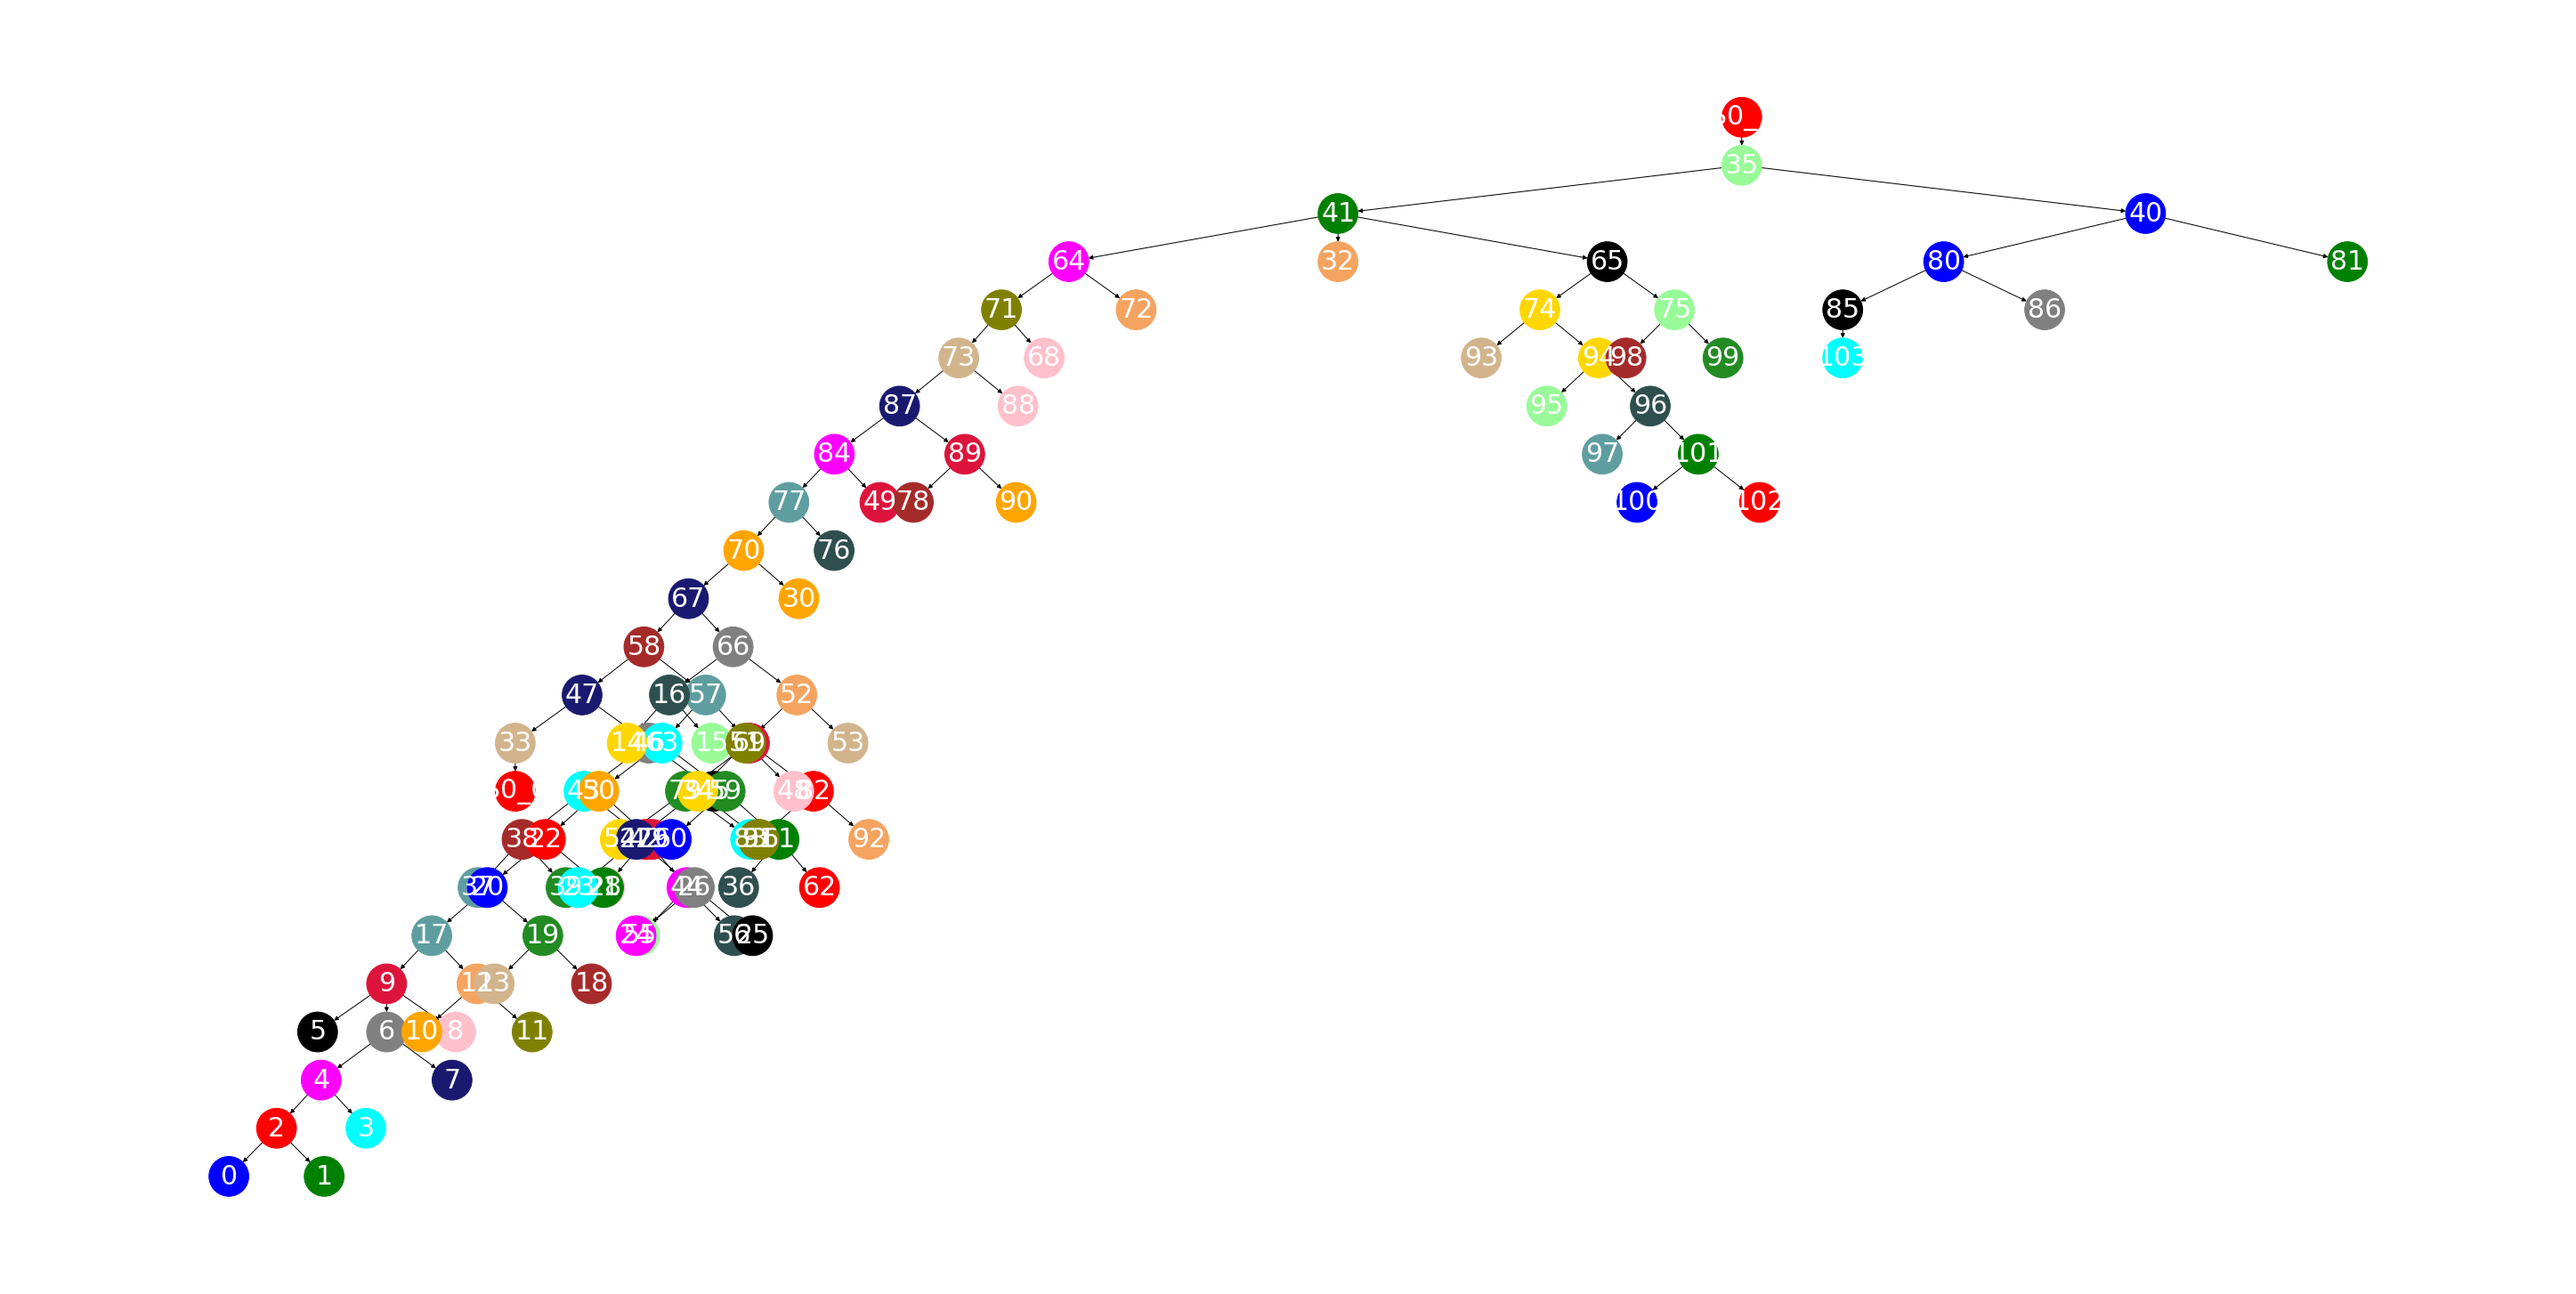

In [42]:
nviz.plot_limb_concept_network_2D(retrieved_obj,
                                 node_colors=ret_col,
                                 starting_soma=0,
                                 starting_soma_group=1)

In [40]:
curr_limb = retrieved_obj[1]

In [41]:
curr_limb.set_concept_network_directional?

In [ ]:
nru.all_soma_connnecting_endpionts_from_starting_info(network_starting_info_revised_cleaned)

In [ ]:
winning_vertex = np.array([1155881.9375  , 519313.2625  , 763731.68125])
nu.matching_rows(total_keep_endpoints,winning_vertex)

In [ ]:
limb_correspondence_individual = pre.filter_limb_correspondence_for_end_nodes(limb_correspondence=limb_correspondence_individual,
                                                 mesh=limb_mesh_mparty,
                                                 starting_info=network_starting_info_revised_cleaned,
                                                filter_end_node_length=filter_end_node_length

                                                )

In [ ]:
total_keep_endpoints

In [ ]:
st_coord = nru.all_soma_connnecting_endpionts_from_starting_info(network_starting_info_revised_cleaned)
st_coord

In [ ]:
st_coord

In [ ]:
total_keep_endpoints

In [ ]:
limb_to_endpoints_must_keep_list

In [ ]:
network_starting_info

In [ ]:
t_verts_list_total

In [ ]:
network_starting_info_revised

In [ ]:
network_starting_info_revised

In [ ]:
network_starting_info_revised[1]

In [ ]:
nru.all_soma_connnecting_endpionts_from_starting_info(network_starting_info_revised)

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_MP_saved,
                             meshes_colors="green",
                             skeleton_colors="blue",
                             scatters=total_keep_endpoints)

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_MAP_saved,
                             meshes_colors="green",
                             skeleton_colors="blue",
                             scatters=st_coord[0:1])

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_individual,
                             meshes_colors="green",
                             skeleton_colors="blue",
                             scatters=st_coord)

# Debugging the limb correspondence error

In [ ]:
for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None


    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size)

    if not curr_limb_endpoints_must_keep is None:
        limb_to_endpoints_must_keep_list.append(curr_limb_endpoints_must_keep)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices)
    else:
        print("Inside MAP decomposition and curr_limb_endpoints_must_keep was None")

    if len(cleaned_branch) == 0:
        raise Exception(f"Found a zero length skeleton for limb {z} of trmesh {branch}")

    if print_fusion_steps:
        print(f"skeletonize_and_clean_connected_branch_CGAL: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 1) Generating Initial Mesh Correspondence -------------------------------------------#
    start_time = time.time()

    print(f"Working on limb correspondence for #{sublimb_idx} MAP piece")
    local_correspondence = mesh_correspondence_first_pass(mesh=mesh,
                                                         skeleton=cleaned_branch,
                                                         distance_by_mesh_center=distance_by_mesh_center,
                                                         connectivity="edges",
                                                         remove_inside_pieces_threshold=100)


    print(f"Total time for decomposition = {time.time() - start_time}")
    if print_fusion_steps:
        print(f"mesh_correspondence_first_pass: {time.time() - fusion_time }")
        fusion_time = time.time()


    #------------- 2) Doing Some checks on the initial corespondence -------- #


    if perform_cleaning_checks:
        check_skeletonization_and_decomp(skeleton=cleaned_branch,
                                        local_correspondence=local_correspondence)

    # -------3) Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece
    local_correspondence_revised = correspondence_1_to_1(mesh=mesh,
                                    local_correspondence=local_correspondence,
                                    curr_limb_endpoints_must_keep=curr_limb_endpoints_must_keep,
                                    curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices)

    # -------3b) Fixing the mesh indices to correspond to the larger mesh as a whole
    for k,v in local_correspondence_revised.items():
        local_correspondence_revised[k]["branch_face_idx"] = mesh_idx[local_correspondence_revised[k]["branch_face_idx"]]

    print(f"Total time for MAP sublimb #{sublimb_idx} mesh processing = {time.time() - mesh_start_time}")

    if print_fusion_steps:
        print(f"correspondence_1_to_1: {time.time() - fusion_time }")
        fusion_time = time.time()

    limb_correspondence_MAP[sublimb_idx] = local_correspondence_revised
    
    raise Exception("Done #0 mesh piece")

print(f"Total time for MAP sublimb processing {time.time() - global_start_time}")

In [ ]:
nviz.plot_objects(mesh,
                 skeletons=[cleaned_branch])

In [ ]:
nviz.plot_limb_correspondence(local_correspondence,mesh_name="correspondence_mesh")

In [ ]:
nviz = reload(nviz)
nviz.plot_limb_correspondence(local_correspondence,mesh_name="correspondence_mesh")

In [ ]:
nviz.plot_limb_correspondence(local_correspondence_revised)

# Debugging the local correspondence

In [ ]:
mesh=mesh
skeleton=cleaned_branch
distance_by_mesh_center=distance_by_mesh_center
connectivity="edges"

skeleton_branches=None

"""
Will come up with the mesh correspondences for all of the skeleton
branches: where there can be overlaps and empty faces

"""
curr_limb_mesh = mesh
curr_limb_sk = skeleton

if skeleton_branches is None:
    if skeleton is None:
        raise Exception("Both skeleton and skeleton_branches is None")
    curr_limb_branches_sk_uneven = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
else:
    curr_limb_branches_sk_uneven = skeleton_branches 

#Doing the limb correspondence for all of the branches of the skeleton
local_correspondence = dict()
for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk_uneven)):
    local_correspondence[j] = dict()


    returned_data = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
                                  curr_limb_mesh,
                                 skeleton_segment_width = 1000,
                                 distance_by_mesh_center=distance_by_mesh_center,
                                                            connectivity=connectivity)
    if len(returned_data) == 0:
        print("Got nothing from first pass so expanding the mesh correspondnece parameters ")
        returned_data = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
                                  curr_limb_mesh,
                                 skeleton_segment_width = 1000,
                                 distance_by_mesh_center=distance_by_mesh_center,
                                buffer=300,
                                 distance_threshold=6000,
                                return_closest_face_on_empty=True,
                                    connectivity=connectivity)

    # Need to just pick the closest face is still didn't get anything

    # ------ 12/3 Addition: Account for correspondence that does not work so just picking the closest face
    curr_branch_face_correspondence, width_from_skeleton = returned_data


#             print(f"curr_branch_sk.shape = {curr_branch_sk.shape}")
#             np.savez("saved_skeleton_branch.npz",curr_branch_sk=curr_branch_sk)
#             tu.write_neuron_off(curr_limb_mesh,"curr_limb_mesh.off")
#             #print(f"returned_data = {returned_data}")
#             raise Exception(f"The output from mesh_correspondence_adaptive_distance was nothing: curr_branch_face_correspondence")


    if len(curr_branch_face_correspondence) > 0:
        curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True,repair=False)
    else:
        curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))


    local_correspondence[j]["branch_skeleton"] = curr_branch_sk
    local_correspondence[j]["correspondence_mesh"] = curr_submesh
    local_correspondence[j]["correspondence_face_idx"] = curr_branch_face_correspondence
    local_correspondence[j]["width_from_skeleton"] = width_from_skeleton

In [ ]:
tu.original_mesh_faces_map(curr_limb_mesh,inside_pieces)

In [ ]:
curr_limb_mesh,len(new_mesh)

In [ ]:
new_mesh = tu.remove_mesh_interior(curr_limb_mesh,size_threshold_to_remove=100,try_hole_close=False,return_removed_pieces=False,
                                  return_face_indices=True)

nviz.plot_objects(curr_limb_mesh.submesh([new_mesh],append=True))

In [ ]:
test_skeleton = curr_limb_branches_sk_uneven[2]
curr_branch_face_correspondence, width_from_skeleton = cu.mesh_correspondence_adaptive_distance(test_skeleton,
                                 new_mesh,
                                 skeleton_segment_width = 1000,
                                 distance_by_mesh_center=distance_by_mesh_center,
                                                            connectivity=connectivity,
                                                                                               #buffer=3000
                                                                                               )

In [ ]:
curr_submesh = new_mesh.submesh([list(curr_branch_face_correspondence)],append=True,repair=False)
nviz.plot_objects(curr_submesh,
                 skeletons=[test_skeleton],
                 meshes=inside_pieces,
                 meshes_colors="red")

In [ ]:
len(face_subtract_indices)

In [ ]:
face_subtract_indices = su.decompress_pickle("face_subtract_indices")
debug_mesh = curr_limb_mesh.submesh([np.unique(np.concatenate(face_subtract_indices))],append=True,)

In [ ]:
ret_val = tu.remove_mesh_interior(debug_mesh,size_threshold_to_remove=100,verbose=True,return_removed_pieces=True)

In [ ]:
debug_mesh_revised,inside_pieces = ret_val

In [ ]:
nviz.plot_objects(main_mesh=debug_mesh_revised,
                meshes=inside_pieces,
                 meshes_colors="random")

In [ ]:
split_meshes = tu.split_significant_pieces(debug_mesh,connectivity="vertices")
nviz.plot_objects(meshes=split_meshes,
                  meshes_colors="random")

In [ ]:
nviz.plot_objects(meshes=tu.split(debug_mesh,connectivity="edges")[0],
                  meshes_colors="random")

In [ ]:
nviz.plot_objects(,
                  skeletons=[test_skeleton])
                  


In [ ]:
face_subtract_indices = su.decompress_pickle("face_subtract_indices")
conn_face_components = nu.intersecting_array_components(face_subtract_indices,sort_components=True)
conn_comps_lenghts = np.array([len(k) for k in conn_face_components])
max_len_components_idx = np.where(conn_comps_lenghts == np.max(conn_comps_lenghts))[0]

#2) Get the face indices for all those in the group
max_len_components_unique_faces = [np.unique(np.concatenate([face_subtract_indices[k] 
                                                             for k in conn_face_components[cmp_idx]])) for cmp_idx in  max_len_components_idx]
unique_removed_faces_pre = max_len_components_unique_faces[np.argmax([len(k) for k in max_len_components_unique_faces])]
unique_removed_faces_pre

In [ ]:
nviz.plot_objects(curr_limb_mesh.submesh([unique_removed_faces_pre],append=True),
                 skeletons=[test_skeleton])

In [ ]:
nviz.plot_objects(skeletons=curr_limb_branches_sk_uneven,
                 scatters=[curr_limb_branches_sk_uneven[2].reshape(-1,3)])

In [ ]:
limb_correspondence_individual[0]

In [ ]:
dict([(k,v) for k,v in limb_correspondence_individual.items() if k in np.arange(10,20)])

In [ ]:
nviz.plot_limb_correspondence(dict([(k,v) for k,v in limb_correspondence_individual.items() if k in np.arange(19,20)]))

In [ ]:
nviz.plot_objects(meshes=mesh_pieces_for_MAP,
                  meshes_colors=["red","black"])

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_MAP)

In [ ]:
nviz.visualize_neuron(
                        recovered_neuron,
                      visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L1="all")
                     )

In [ ]:
curr_br_endpts_unique

In [ ]:
nviz.plot_objects(skeletons=[curr_skeleton_MAP,curr_skeleton_MP],
                 skeletons_colors=["red","black"],
                 scatters=[MAP_stitch_point.reshape(-1,3)],
                 scatter_size=0.4)

In [ ]:
curr_br_endpts_unique

In [ ]:
nu.setdiff2d(curr_br_endpts_unique,total_keep_endpoints)

In [ ]:
st = time.time()
np.array([k for k in curr_br_endpts_unique if len(nu.matching_rows(total_keep_endpoints,k))==0])
print(f"total time = {time.time() - st}")

In [ ]:
st = time.time()
np.array([k for k in curr_br_endpts_unique if len(nu.matching_rows(total_keep_endpoints,k))==0])
print(f"total time = {time.time() - st}")

In [ ]:
sk = reload(sk)
sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True,
                                                    possible_node_coordinates=nu.setdiff2d(curr_br_endpts_unique,total_keep_endpoints),
                                                    excluded_node_coordinates=total_keep_endpoints,
                                                    )

In [ ]:
network_starting_info_revised_cleaned

In [ ]:
st_endpts = nru.all_soma_connnecting_endpionts_from_starting_info(network_starting_info_revised_cleaned,multiple_limbs=False)
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_MAP_saved)
nviz.plot_objects(meshes=meshes,
                  skeletons=skeletons,
                             meshes_colors="green",
                             skeletons_colors="blue",
                 scatters=[st_endpts],
                 scatter_size=0.5)

In [ ]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_individual)

In [ ]:
total_skeleton = sk.stack_skeletons(skeletons)

In [ ]:
nviz.plot_objects(
                #meshes=meshes,
                skeletons=[skeletons[k] for k in [1,86]],
                 skeletons_colors="random",
                scatters=[skeletons[1].reshape(-1,3)],
    scatter_size=1
)

In [ ]:
sk.calculate_skeleton_distance(skeletons[1])

In [ ]:
sk.calculate_skeleton_distance(skeletons[86])

In [ ]:
sk.find_branch_skeleton_with_specific_coordinate(skeletons,st_endpts[2])

In [ ]:
st_endpts = nru.all_soma_connnecting_endpionts_from_starting_info(network_starting_info_revised_cleaned,multiple_limbs=False)
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_individual)
nviz.plot_objects(meshes=meshes,
                  skeletons=skeletons,
                             meshes_colors="green",
                             skeletons_colors="blue",
                 scatters=[st_endpts[2]],
                 scatter_size=0.5)

In [ ]:

st_endpts

In [ ]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_MAP_saved)
nviz.plot_objects(meshes=meshes,
                  skeletons=skeletons,
                             meshes_colors="green",
                             skeletons_colors="blue",
                 scatters=[st_endpts],
                 scatter_size=0.1)

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_MP,
                             meshes_colors="green",
                             skeleton_colors="blue")

In [ ]:
"""
Big Conclusion: the large mesh pieces themselves (before combining into map pieces)
themselves aren't totally connected by edges (can be split)

- so even if large pieces do have a shared edge and you combine them together,
they can still be split by the edges into multiple pieces

Solution: should have to do split by vertices in the skeletonization

"""

In [ ]:
for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None


    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size,
    skeleton_print=True,
    connectivity="vertices"
    )
    
    raise Exception("")

In [ ]:
nviz.plot_objects(meshes=[mesh_pieces_for_MAP[0]],
                 skeletons=[cleaned_branch])

In [ ]:
current_mesh_splits = tu.split_significant_pieces(mesh_pieces_for_MAP[0],
                               significance_threshold=1,
                                                  connectivity="vertices")
current_mesh_splits

In [ ]:
tu.